In [118]:
import pandas as pd
import os
import numpy as np
import statsmodels.api as sm

In [119]:
# importing filtered data 
filtered = pd.read_csv('/Users/junsik/Documents/Dickinson College/Spring 2025/DATA 400/Final Project/Data/Final Project Data Jan 4 2025/filtered.csv')

/var/folders/_c/t_p4w1f91_11yj717hx6qttc0000gn/T/ipykernel_98628/685495345.py:2: DtypeWarning:

Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.



In [120]:
filtered

,Unnamed: 0.1,Unnamed: 0,city,address,zip_code,parcel_id,location,sale_date,sale_price
0,2625090,53162,PHILADELPHIA,1841 OAKMONT ST,19111.0,50016134.0,NaN,2000-01-05 05:00:00+00:00,88000.0
1,2626395,54467,PHILADELPHIA,4516 ALDINE ST,19136.0,50015541.0,NaN,2000-01-04 05:00:00+00:00,39515.0
2,2626751,54823,PHILADELPHIA,821 CATHARINE ST,19147.0,50018248.0,NaN,2000-01-07 05:00:00+00:00,150000.0
3,2626765,54837,PHILADELPHIA,3311 W PENN ST,19129.0,50018066.0,NaN,2000-01-07 05:00:00+00:00,115000.0
4,2626881,54953,PHILADELPHIA,211 N CECIL ST,19139.0,50018288.0,NaN,2000-01-07 05:00:00+00:00,25000.0
...,...,...,...,...,...,...,...,...,...
1794721,6322840,1097624,Stamford,193 SADDLE HILL ROAD,NaN,2200073,POINT (-73.577612999 41.148977983),2022-10-11,865000.0
1794722,6322841,1097625,Wethersfield,37 LUCA LN,NaN,220369,POINT (-72.663607 41.712487),2023-09-29,760857.0
1794723,6322842,1097626,Stamford,1096 EAST MAIN STREET #16-D-1,NaN,2200470,POINT (-73.515726977 41.057837988),2023-01-09,220000.0
1794724,6322843,1097627,Old Saybrook,115 SHEFFIELD ST,NaN,22396,POINT (-72.368005967 41.289124997),2023-09-26,1575000.0


In [121]:
# importing all ACS data 
# Define the path to the parent folder containing all subfolders
parent_folder = '/Users/junsik/Documents/Dickinson College/Spring 2025/DATA 400/Final Project/Data/Final Project Data Jan 4 2025/ACS_data/merged_files'  # Replace with the actual path

# Create an empty dictionary to store DataFrames
acs_dataframes = {}

# Loop through all subfolders and files in the parent folder
for root, dirs, files in os.walk(parent_folder):
    for file in files:
        if file.endswith('.csv'):  # Check if the file is a CSV
            file_path = os.path.join(root, file)
            # Use the CSV file name (without extension) as the DataFrame name
            df_name = os.path.splitext(file)[0]
            acs_dataframes[df_name] = pd.read_csv(file_path)

# Access individual DataFrames by their names
for name, df in acs_dataframes.items():
    print(f"DataFrame: {name}")
#     print(df.head())  # Display the first few rows of each DataFrame

DataFrame: detroit_income
DataFrame: detroit_race
DataFrame: detroit_employment
DataFrame: detroit_ed_attainment
DataFrame: ct_race
DataFrame: ct_income
DataFrame: ct_employment
DataFrame: ct_ed_attainment
DataFrame: philly_race
DataFrame: philly_employment
DataFrame: philly_ed_attainment
DataFrame: philly_income
DataFrame: pittsburgh_race
DataFrame: pittsburgh_employment
DataFrame: pittsburgh_income
DataFrame: pittsburgh_ed_attainment


In [122]:
# # importing all commerce data 

# # Define the path to the folder containing all CSV files
# folder_path = '/Users/junsik/Documents/Dickinson College/Spring 2025/DATA 400/Final Project/Data/Final Project Data Jan 4 2025/commerce_data'  # Replace with the actual path to your folder

# # Create an empty dictionary to store DataFrames
# commerce_dataframes = {}

# # Loop through all files in the folder
# for file in os.listdir(folder_path):
#     if file.endswith('.csv'):  # Check if the file is a CSV
#         file_path = os.path.join(folder_path, file)
#         # Use the CSV file name (without extension) as the DataFrame name
#         df_name = os.path.splitext(file)[0]
#         commerce_dataframes[df_name] = pd.read_csv(file_path)

# # Access individual DataFrames by their names
# for name, df in commerce_dataframes.items():
#     print(f"DataFrame: {name}")
# #     print(df.head())  # Display the first few rows of each DataFrame

In [123]:
# # importing crime data 

# # Define the path to the folder containing all CSV files
# folder_path = '/Users/junsik/Documents/Dickinson College/Spring 2025/DATA 400/Final Project/Data/Final Project Data Jan 4 2025/crime_data'

# # Create an empty dictionary to store DataFrames
# crime_dataframes = {}

# # Loop through all files in the folder
# for file in os.listdir(folder_path):
#     if file.endswith('.csv'):  # Check if the file is a CSV
#         file_path = os.path.join(folder_path, file)
#         df_name = os.path.splitext(file)[0]  # Use the CSV file name (without extension) as the DataFrame name
#         try:
#             # Read the CSV file and skip bad lines
#             crime_dataframes[df_name] = pd.read_csv(file_path, on_bad_lines='skip')
#         except Exception as e:
#             print(f"Error reading {file}: {e}")

# # Access individual DataFrames by their names
# for name, df in crime_dataframes.items():
#     print(f"DataFrame: {name}")
# #     print(df.head())  # Display the first few rows of each DataFrame

## Cleaning up income ACS dfs

In [124]:
# === INCOME CLEANING FUNCTION ===
def clean_income_df(df):
    # Set the first row as the header and drop it
    df.columns = df.iloc[0]
    df = df[1:].copy().reset_index(drop=True)

    # Renaming
    df = df.rename(columns={
        'Geographic Area Name': 'Census Tract',
        'Geography': 'GEOID',
        'Households!!Estimate!!Median income (dollars)': 'Median Income (Households)',
        'Families!!Estimate!!Median income (dollars)': 'Median Income (Families)',
        'Married-couple families!!Estimate!!Median income (dollars)': 'Median Income (Married Families)',
        'Nonfamily households!!Estimate!!Median income (dollars)': 'Median Income (Nonfamily Households)'
    })

    # Extracting numeric part from GEOID 
    df['GEOID'] = df['GEOID'].str.extract(r'US(\d+)', expand=False)

    # Extract only 'Census Tract xxxx'
    df['Census Tract'] = df['Census Tract'].str.extract(r'(Census Tract \d+)', expand=False)

    # Columns to keep
    keep_cols = [
        'GEOID',
        'Census Tract',
        'Median Income (Households)',
        'Median Income (Families)',
        'Median Income (Married Families)',
        'Median Income (Nonfamily Households)'
    ]

    # Subset the DataFrame
    df = df[keep_cols]

    # Replace '-' with NaN and convert median income columns to numeric
    for col in keep_cols[2:]:
        df[col] = df[col].replace('-', np.nan)
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Drop rows where all median income values are missing
    df.dropna(subset=keep_cols[1:], how='all', inplace=True)
    df = df.groupby(['Census Tract', 'GEOID'], as_index=False).mean(numeric_only=True).round(0)

    # Drop duplicates by GEOID, keeping the first
    df = df.drop_duplicates(subset='GEOID', keep='first')

    return df

cleaned_income_dfs = {}

city_income_dfs = {
    "detroit": acs_dataframes['detroit_income'],
    "philadelphia": acs_dataframes['philly_income'],
    "pittsburgh": acs_dataframes['pittsburgh_income'],
    "ct": acs_dataframes['ct_income']
}

for city, df in city_income_dfs.items():
    cleaned_df = clean_income_df(df)
    cleaned_income_dfs[city] = cleaned_df
    cleaned_df.to_csv(f"cleaned_income_{city}.csv", index=False)

# View one of the cleaned DataFrames, for example Detroit:
cleaned_income_dfs["detroit"]


,Census Tract,GEOID,Median Income (Households),Median Income (Families),Median Income (Married Families),Median Income (Nonfamily Households)
0,Census Tract 5001,26163500100,36880.0,34637.0,65424.0,34859.0
1,Census Tract 5002,26163500200,43146.0,41259.0,82650.0,36883.0
2,Census Tract 5003,26163500300,30881.0,29263.0,59897.0,24115.0
3,Census Tract 5004,26163500400,25733.0,23495.0,41176.0,24321.0
4,Census Tract 5005,26163500500,37054.0,36075.0,64538.0,31220.0
...,...,...,...,...,...,...
713,Census Tract 9865,26163986502,NaN,NaN,NaN,NaN
714,Census Tract 9866,26163986600,NaN,NaN,NaN,NaN
715,Census Tract 9870,26163987000,NaN,NaN,NaN,NaN
716,Census Tract 9901,26163990100,NaN,NaN,NaN,NaN


## Cleaning up the Education ACS data 

In [125]:
# === EDUCATION CLEANING FUNCTION ===
def clean_education_df(df):
    df.columns = df.iloc[0]
    df = df[1:].copy().reset_index(drop=True)

    # Renaming columns
    df = df.rename(columns={
        'Geographic Area Name': 'Census Tract',
        'Geography': 'GEOID',
        'Total!!Estimate!!Less than high school graduate': 'Less than High School (%)',
        'Total!!Estimate!!High school graduate (includes equivalency)': 'High School Graduate (%)',
        "Total!!Estimate!!Some college or associate's degree": 'Some College or Associate Degree (%)',
        "Total!!Estimate!!Bachelor's degree or higher": "Bachelor's Degree or Higher (%)"
    })

    # Extract numeric part from GEOID (everything after 'US')
    df['GEOID'] = df['GEOID'].str.extract(r'US(\d+)', expand=False)

    # Extracting numeric part from Census Tract
    df['Census Tract'] = df['Census Tract'].str.extract(r'(Census Tract \d+)', expand=False)

    keep_cols = [
        'Census Tract',
        'GEOID',
        'Less than High School (%)',
        'High School Graduate (%)',
        'Some College or Associate Degree (%)',
        "Bachelor's Degree or Higher (%)"
    ]
    df = df[keep_cols]

    # Drop duplicates by GEOID, keeping the first
    df = df.drop_duplicates(subset='GEOID', keep='first')

    return df

# === PROCESS EDUCATION DATA ===
cleaned_education_dfs = {}
city_education_dfs = {
    "detroit": acs_dataframes['detroit_ed_attainment'],
    "philadelphia": acs_dataframes['philly_ed_attainment'],
    "pittsburgh": acs_dataframes['pittsburgh_ed_attainment'],
    "ct": acs_dataframes['ct_ed_attainment']
}
for city, df in city_education_dfs.items():
    cleaned_df = clean_education_df(df)
    cleaned_education_dfs[city] = cleaned_df
    cleaned_df.to_csv(f"cleaned_education_{city}.csv", index=False)
    print(f"Saved cleaned_education_{city}.csv")

# View one cleaned education DataFrame, for example Detroit:
cleaned_education_dfs["detroit"]

Saved cleaned_education_detroit.csv
Saved cleaned_education_philadelphia.csv
Saved cleaned_education_pittsburgh.csv
Saved cleaned_education_ct.csv


,Census Tract,GEOID,Less than High School (%),High School Graduate (%),Some College or Associate Degree (%),Bachelor's Degree or Higher (%)
0,Census Tract 5001,26163500100,26.1,48.1,24.1,1.8
1,Census Tract 5002,26163500200,8.4,39.9,11.9,39.9
2,Census Tract 5003,26163500300,45.8,42.3,8.4,3.5
3,Census Tract 5004,26163500400,75.9,18.6,5.5,0.0
4,Census Tract 5005,26163500500,29.7,55.0,15.3,0.0
...,...,...,...,...,...,...
6740,Census Tract 9864,26163986400,0,15,0,0
6741,Census Tract 9865,26163986501,0,0,0,0
6742,Census Tract 9865,26163986502,0,0,0,0
6743,Census Tract 9866,26163986600,0,0,0,0


### Checking how many census tracts match between Education and Income data

In [126]:
for city in cleaned_income_dfs.keys():
    income_tracts = set(cleaned_income_dfs[city]['Census Tract'].dropna().unique())
    ed_tracts = set(cleaned_education_dfs[city]['Census Tract'].dropna().unique())

    only_in_income = income_tracts - ed_tracts
    only_in_ed = ed_tracts - income_tracts

    print(f"\nCity: {city.capitalize()}")
    print(f"  Tracts only in income data: {sorted(only_in_income)}")
    print(f"  Tracts only in education data: {sorted(only_in_ed)}")
    print(f"  Matching tracts: {len(income_tracts & ed_tracts)} / {len(income_tracts | ed_tracts)} total unique tracts")


City: Detroit
  Tracts only in income data: []
  Tracts only in education data: []
  Matching tracts: 661 / 661 total unique tracts

City: Philadelphia
  Tracts only in income data: []
  Tracts only in education data: []
  Matching tracts: 330 / 330 total unique tracts

City: Pittsburgh
  Tracts only in income data: []
  Tracts only in education data: []
  Matching tracts: 378 / 378 total unique tracts

City: Ct
  Tracts only in income data: []
  Tracts only in education data: []
  Matching tracts: 1342 / 1342 total unique tracts


## Cleaning up race ACS data

In [127]:
# === RACE CLEANING FUNCTION ===
def clean_race_df(df):
    df.columns = df.iloc[0]
    df = df[1:].copy().reset_index(drop=True)

    # Renaming 
    df = df.rename(columns={
        'Geographic Area Name': 'Census Tract',
        'Geography': 'GEOID',
        'Estimate!!Total': 'Total Population'
    })

    # Extract GEOID from the GEO_ID column
    df['GEOID'] = df['GEOID'].str.extract(r'US(\d+)', expand=False)

    # Extract only 'Census Tract xxxx'
    df['Census Tract'] = df['Census Tract'].str.extract(r'(Census Tract \d+)', expand=False)

    # Convert all relevant race columns to numeric
    for col in df.columns:
        if col != 'Census Tract':
            df[col] = df[col].replace('-', np.nan)
            df[col] = pd.to_numeric(df[col], errors='coerce')

    keep = [
        'GEOID',
        'Census Tract',
        'Total Population',
        'Estimate!!Total!!White alone',
        'Estimate!!Total!!Black or African American alone',
        'Estimate!!Total!!Asian alone'
    ]
    race_columns_to_sum = [col for col in df.columns if col not in keep and col != 'Census Tract']
    df['Estimate!!Total!!Others'] = df[race_columns_to_sum].sum(axis=1)

    # Convert race totals to percentages
    df['White (%)'] = (df['Estimate!!Total!!White alone'] / df['Total Population']) * 100
    df['Black (%)'] = (df['Estimate!!Total!!Black or African American alone'] / df['Total Population']) * 100
    df['Asian (%)'] = (df['Estimate!!Total!!Asian alone'] / df['Total Population']) * 100
    df['Other (%)'] = (df['Estimate!!Total!!Others'] / df['Total Population']) * 100

    # Drop raw total race counts
    df = df.drop(columns=[
        'Estimate!!Total!!White alone',
        'Estimate!!Total!!Black or African American alone',
        'Estimate!!Total!!Asian alone',
        'Estimate!!Total!!Others'
    ])

    df = df[['GEOID', 'Census Tract', 'Total Population', 'White (%)', 'Black (%)', 'Asian (%)', 'Other (%)']]

    # Drop duplicates by GEOID, keeping the first
    df = df.drop_duplicates(subset='GEOID', keep='first')

    return df

# === PROCESS RACE DATA ===
cleaned_race_dfs = {}
city_race_dfs = {
    "detroit": acs_dataframes['detroit_race'],
    "philadelphia": acs_dataframes['philly_race'],
    "pittsburgh": acs_dataframes['pittsburgh_race'],
    "ct": acs_dataframes['ct_race']
}
for city, df in city_race_dfs.items():
    cleaned_df = clean_race_df(df)
    cleaned_race_dfs[city] = cleaned_df
    cleaned_df.to_csv(f"cleaned_race_{city}.csv", index=False)
    print(f"Saved cleaned_race_{city}.csv")

# View one cleaned race DataFrame, for example Detroit:
cleaned_race_dfs["detroit"]

Saved cleaned_race_detroit.csv
Saved cleaned_race_philadelphia.csv
Saved cleaned_race_pittsburgh.csv
Saved cleaned_race_ct.csv


,GEOID,Census Tract,Total Population,White (%),Black (%),Asian (%),Other (%)
0,2.616350e+10,Census Tract 5001,3557.0,5.847624,93.533877,0.000000,1.265111e+00
1,2.616350e+10,Census Tract 5002,3045.0,8.801314,83.809524,3.973727,6.896552e+00
2,2.616350e+10,Census Tract 5003,3225.0,7.255814,90.945736,0.000000,3.503876e+00
3,2.616350e+10,Census Tract 5004,1628.0,4.361179,95.638821,0.000000,2.457002e-01
4,2.616350e+10,Census Tract 5005,2579.0,2.675456,91.314463,0.000000,7.483521e+00
...,...,...,...,...,...,...,...
6740,2.616399e+10,Census Tract 9864,45.0,66.666667,33.333333,0.000000,1.498000e+04
6741,2.616399e+10,Census Tract 9865,0.0,NaN,NaN,NaN,inf
6742,2.616399e+10,Census Tract 9865,0.0,NaN,NaN,NaN,inf
6743,2.616399e+10,Census Tract 9866,0.0,NaN,NaN,NaN,inf


## Cleaning up employment ACS data 

In [128]:
# === EMPLOYMENT CLEANING FUNCTION ===
def clean_employment_df(df):
    df.columns = df.iloc[0]
    df = df[1:].copy().reset_index(drop=True)
    
    # Renaming
    df = df.rename(columns={
        'Geographic Area Name': 'Census Tract',
        'Geography': 'GEOID',
        'Unemployment rate!!Estimate!!Population 16 years and over': 'Unemployment Rate (%)'
    })

    # Extract GEOID from the GEO_ID column
    df['GEOID'] = df['GEOID'].str.extract(r'US(\d+)', expand=False)

    # Extract Census Tract
    df['Census Tract'] = df['Census Tract'].str.extract(r'(Census Tract \d+)', expand=False)

    # Keep only GEOID, Census Tract, and Unemployment Rate
    df = df[['GEOID', 'Census Tract', 'Unemployment Rate (%)']]
    df['Unemployment Rate (%)'] = df['Unemployment Rate (%)'].replace('-', np.nan)
    df['Unemployment Rate (%)'] = pd.to_numeric(df['Unemployment Rate (%)'], errors='coerce')
    df.dropna(subset=['Unemployment Rate (%)'], how='all', inplace=True)

    # Drop duplicates by GEOID, keeping the first
    # Duplicates exist by GEOID, so we just kept only the first values 
    df = df.drop_duplicates(subset='GEOID', keep='first')

    return df

# === PROCESS EMPLOYMENT DATA ===
cleaned_employment_dfs = {}
city_employment_dfs = {
    "detroit": acs_dataframes['detroit_employment'],
    "philadelphia": acs_dataframes['philly_employment'],
    "pittsburgh": acs_dataframes['pittsburgh_employment'],
    "ct": acs_dataframes['ct_employment']
}
for city, df in city_employment_dfs.items():
    cleaned_df = clean_employment_df(df)
    cleaned_employment_dfs[city] = cleaned_df
    cleaned_df.to_csv(f"cleaned_employment_{city}.csv", index=False)
    print(f"Saved cleaned_employment_{city}.csv")

# View one cleaned employment DataFrame, for example Detroit:
cleaned_employment_dfs["detroit"]

Saved cleaned_employment_detroit.csv
Saved cleaned_employment_philadelphia.csv
Saved cleaned_employment_pittsburgh.csv
Saved cleaned_employment_ct.csv


,GEOID,Census Tract,Unemployment Rate (%)
0,26163500100,Census Tract 5001,25.6
1,26163500200,Census Tract 5002,18.0
2,26163500300,Census Tract 5003,32.0
3,26163500400,Census Tract 5004,34.8
4,26163500500,Census Tract 5005,36.7
...,...,...,...
6691,26163595201,Census Tract 5952,2.7
6697,26163599001,Census Tract 5990,3.9
6718,26163983400,Census Tract 9834,11.6
6740,26163986400,Census Tract 9864,0.0


### How many tracts intersect with each other

In [129]:
# === TRACT INTERSECTION REPORT ===
for city in cleaned_income_dfs.keys():
    income_tracts = set(cleaned_income_dfs[city]['Census Tract'].dropna())
    edu_tracts = set(cleaned_education_dfs[city]['Census Tract'].dropna())
    race_tracts = set(cleaned_race_dfs[city]['Census Tract'].dropna())
    emp_tracts = set(cleaned_employment_dfs[city]['Census Tract'].dropna())

    common_tracts = income_tracts & edu_tracts & race_tracts & emp_tracts

    print(f"\nCity: {city.capitalize()}")
    print(f"  Total Census Tracts in Income: {len(income_tracts)}")
    print(f"  Total Census Tracts in Education: {len(edu_tracts)}")
    print(f"  Total Census Tracts in Race: {len(race_tracts)}")
    print(f"  Total Census Tracts in Employment: {len(emp_tracts)}")
    print(f"  ➤ Tracts present in ALL four datasets: {len(common_tracts)}")


City: Detroit
  Total Census Tracts in Income: 661
  Total Census Tracts in Education: 661
  Total Census Tracts in Race: 661
  Total Census Tracts in Employment: 628
  ➤ Tracts present in ALL four datasets: 628

City: Philadelphia
  Total Census Tracts in Income: 330
  Total Census Tracts in Education: 330
  Total Census Tracts in Race: 330
  Total Census Tracts in Employment: 321
  ➤ Tracts present in ALL four datasets: 321

City: Pittsburgh
  Total Census Tracts in Income: 378
  Total Census Tracts in Education: 378
  Total Census Tracts in Race: 378
  Total Census Tracts in Employment: 375
  ➤ Tracts present in ALL four datasets: 375

City: Ct
  Total Census Tracts in Income: 1342
  Total Census Tracts in Education: 1342
  Total Census Tracts in Race: 756
  Total Census Tracts in Employment: 1307
  ➤ Tracts present in ALL four datasets: 753


### Combining dfs into one per city 

In [130]:
# === COMBINE CLEANED DATASETS PER CITY ===
combined_city_dfs = {}

for city in cleaned_income_dfs:
    income = cleaned_income_dfs[city].copy()
    edu = cleaned_education_dfs[city].copy()
    race = cleaned_race_dfs[city].copy()
    emp = cleaned_employment_dfs[city].copy()

    # Normalize GEOID formatting
    for df in [income, edu, race, emp]:
        df['GEOID'] = df['GEOID'].astype(str).str.extract(r'(\d+)', expand=False).str.strip().str.zfill(11)

    # Find shared GEOIDs
    common_geoids = set(income['GEOID']) & set(edu['GEOID']) & set(race['GEOID']) & set(emp['GEOID'])

    # Filter each dataframe to only common GEOIDs
    income = income[income['GEOID'].isin(common_geoids)]
    edu = edu[edu['GEOID'].isin(common_geoids)]
    race = race[race['GEOID'].isin(common_geoids)]
    emp = emp[emp['GEOID'].isin(common_geoids)]

    # Drop 'Census Tract' from all but one dataframe to avoid merge conflicts
    edu = edu.drop(columns=['Census Tract'], errors='ignore')
    race = race.drop(columns=['Census Tract'], errors='ignore')
    emp = emp.drop(columns=['Census Tract'], errors='ignore')

    # Merge them all on 'GEOID'
    merged = income.merge(edu, on='GEOID')\
                   .merge(race, on='GEOID')\
                   .merge(emp, on='GEOID')

    combined_city_dfs[city] = merged
    merged.to_csv(f"compiled_{city}_acs.csv", index=False)
    print(f"Saved compiled_{city}_acs.csv with {len(merged)} tracts")

Saved compiled_detroit_acs.csv with 678 tracts
Saved compiled_philadelphia_acs.csv with 408 tracts
Saved compiled_pittsburgh_acs.csv with 426 tracts
Saved compiled_ct_acs.csv with 1807 tracts


## Reading in Processed commerce data

In [131]:
# Define the path to the parent folder containing all subfolders
parent_folder = '/Users/junsik/Documents/Dickinson College/Spring 2025/DATA 400/Final Project/Data/OneDrive Apr 7 2025/processed_commerce_data'

# Create an empty dictionary to store DataFrames
compiled_commerce_dataframes = {}

# Track imported files
imported_files = []

# Loop through all subfolders and files in the parent folder
for root, dirs, files in os.walk(parent_folder):
    for file in files:
        if file.endswith('.csv'):
            file_path = os.path.join(root, file)
            df_name = os.path.splitext(file)[0]
            df = pd.read_csv(file_path)

            # Standardize GEOID if the column exists
            if 'GEOID_TRACT_20' in df.columns:
                df = df.rename(columns={'GEOID_TRACT_20': 'GEOID'})
            elif 'tract' in df.columns:
                df = df.rename(columns={'tract': 'GEOID'})

            if 'GEOID' in df.columns:
                df['GEOID'] = df['GEOID'].astype(str).str.extract(r'(\d+)', expand=False).str.strip().str.zfill(11)

            # Keep only GEOID and total_businesses columns
            keep_cols = ['GEOID', 'total_businesses']
            df = df[[col for col in df.columns if col in keep_cols]]
            
            # Rename for readability
            df = df.rename(columns={'total_businesses': 'Total Businesses'})

            compiled_commerce_dataframes[df_name] = df
            imported_files.append(df_name)

# Print summary of imported files
print("✅ Imported the following commerce data files:")
for name in imported_files:
    print(f"  - {name}")

✅ Imported the following commerce data files:
  - processed_ct_commerce
  - processed_philly_commerce
  - processed_detroit_commerce
  - processed_pitt_commerce


## Merging ACS with Commerce Data 

In [132]:
# Map between ACS city keys and their corresponding commerce DataFrame names
commerce_key_map = {
    "detroit": "processed_detroit_commerce",
    "philadelphia": "processed_philly_commerce",
    "pittsburgh": "processed_pitt_commerce",
    "ct": "processed_ct_commerce"
}

merged_acs_commerce_dfs = {}

for city, acs_df in combined_city_dfs.items():
    acs_df = acs_df.copy()
    commerce_key = commerce_key_map.get(city)

    if commerce_key in compiled_commerce_dataframes:
        commerce_df = compiled_commerce_dataframes[commerce_key].copy()

        # Merge
        merged = acs_df.merge(commerce_df, on="GEOID", how="inner")
        merged_acs_commerce_dfs[city] = merged

        # Save to CSV
        merged.to_csv(f"merged_{city}_acs_commerce.csv", index=False)
        print(f"✅ Merged {city.capitalize()} — {len(merged)} tracts saved.")
    else:
        print(f"⚠️  No commerce data found for {city}")

✅ Merged Detroit — 289 tracts saved.
✅ Merged Philadelphia — 382 tracts saved.
✅ Merged Pittsburgh — 204 tracts saved.
✅ Merged Ct — 874 tracts saved.


## Reading in processed crime data 

In [133]:
import os
import pandas as pd

# Define the path to the parent folder containing all subfolders
parent_folder = '/Users/junsik/Documents/Dickinson College/Spring 2025/DATA 400/Final Project/Data/OneDrive Apr 7 2025/Processed Crime Data'

# Cleaned and averaged crime data
cleaned_crime_dataframes = {}

# Track imported files
imported_files = []

# Read in files first
for root, dirs, files in os.walk(parent_folder):
    for file in files:
        if file.endswith('.csv'):
            file_path = os.path.join(root, file)
            df_name = os.path.splitext(file)[0]
            df = pd.read_csv(file_path)

            # Skip Connecticut data if present
            if 'ct' in df_name.lower():
                print(f"\u23ED\ufe0f Skipping: {df_name}")
                continue

            print(f"Processing: {df_name}")

            # Standardize GEOID
            if 'GEOID' in df.columns:
                pass  # it's already named GEOID
            elif 'geoid' in df.columns:
                df = df.rename(columns={'geoid': 'GEOID'})
            elif 'geo_id' in df.columns:
                df = df.rename(columns={'geo_id': 'GEOID'})
            else:
                print(f"⚠️ Skipping {df_name} because no GEOID-related column found.")
                continue

            # Now standardize depending on city
            if 'det' in df_name.lower():
                # Detroit: special fix
                df['GEOID'] = df['GEOID'].astype(str)
                df['GEOID'] = df['GEOID'].str.split('.').str[0]
                df['GEOID'] = df['GEOID'].str.slice(0, 11)
                df['GEOID'] = df['GEOID'].str.zfill(11)
            else:
                # Normal cases
                df['GEOID'] = df['GEOID'].astype(str).str.extract(r'(\d+)', expand=False).str.zfill(11)

            # Drop year columns and unnamed columns
            year_cols = [col for col in df.columns if 'year' in col.lower() or col.startswith('Unnamed')]
            df = df.drop(columns=year_cols, errors='ignore')

            # Keep only numeric columns and GEOID
            numeric_cols = df.select_dtypes(include='number').columns.tolist()
            if 'GEOID' not in numeric_cols:
                numeric_cols.append('GEOID')
            df = df[numeric_cols]

            # Group by GEOID and average
            df_avg = df.groupby('GEOID', as_index=False).mean().round(2)

            # Rename crime columns
            df_avg = df_avg.rename(columns={
                'nuisance_crime': 'Nuisance Crime Rate',
                'other_crime': 'Other Crime Rate',
                'property_crime': 'Property Crime Rate',
                'violent_crime': 'Violent Crime Rate',
                'total_offenses': 'Total Crime Rate'
            })

            cleaned_crime_dataframes[df_name] = df_avg
            imported_files.append(df_name)

# Print imported files
print("\n✅ Imported and cleaned the following crime data files:")
for name in imported_files:
    print(f"  - {name}")


Processing: new_processed_pitt_crime
Processing: new_processed_phl
Processing: new_processed_det
⏭️ Skipping: processed_ct copy

✅ Imported and cleaned the following crime data files:
  - new_processed_pitt_crime
  - new_processed_phl
  - new_processed_det


## Merging Crime data with ACS and Commerce Data

In [134]:
# === Merge crime data into merged ACS + Commerce data ===
crime_key_map = {
    "philadelphia": "new_processed_phl",
    "pittsburgh": "new_processed_pitt_crime",
    "detroit": "new_processed_det"
}

merged_acs_commerce_crime_dfs = {}

for city, acs_commerce_df in merged_acs_commerce_dfs.items():
    crime_key = crime_key_map.get(city)

    if crime_key and crime_key in cleaned_crime_dataframes:
        crime_df = cleaned_crime_dataframes[crime_key].copy()

        # Merge on GEOID
        merged = acs_commerce_df.merge(crime_df, on='GEOID', how='inner')
        merged_acs_commerce_crime_dfs[city] = merged

        # Save result
        merged.to_csv(f"merged_{city}_acs_commerce_crime.csv", index=False)
        print(f"✅ Merged {city.capitalize()} with ACS + Commerce + Crime — {len(merged)} tracts saved.")
    else:
        print(f"⚠️  No crime data found for {city}")

✅ Merged Detroit with ACS + Commerce + Crime — 265 tracts saved.
✅ Merged Philadelphia with ACS + Commerce + Crime — 351 tracts saved.
✅ Merged Pittsburgh with ACS + Commerce + Crime — 95 tracts saved.
⚠️  No crime data found for ct


## Reading in Sales Data 

In [135]:
# Importing Sales Data  
sales = pd.read_csv('/Users/junsik/Documents/Dickinson College/Spring 2025/DATA 400/Final Project/Data/OneDrive Apr 7 2025/full_merged_sales.csv')

# Rename and standardize columns
sales = sales.rename(columns={
    'geo_id': 'GEOID',
    'zip_code': 'Zip Code',
    'sale_date': 'Sale Date',
    'sale_price': 'Sale Price',
    'city': 'City',
    'address': 'Address',
    'location': 'Location'
})

# Format columns
sales['GEOID'] = sales['GEOID'].astype(str).str.zfill(11)
sales['Zip Code'] = sales['Zip Code'].astype(int)

sales.head()

/var/folders/_c/t_p4w1f91_11yj717hx6qttc0000gn/T/ipykernel_98628/1348541265.py:2: DtypeWarning:

Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.



,Unnamed: 0,City,Address,Zip Code,parcel_id,Location,Sale Date,Sale Price,GEOID
0,0,PHILADELPHIA,1841 OAKMONT ST,19111,50016134.0,NaN,2000-01-05 05:00:00+00:00,88000.0,42101030501
1,1,PHILADELPHIA,1841 OAKMONT ST,19111,50016134.0,NaN,2000-01-05 05:00:00+00:00,88000.0,42101030502
2,2,PHILADELPHIA,1841 OAKMONT ST,19111,50016134.0,NaN,2000-01-05 05:00:00+00:00,88000.0,42101030600
3,3,PHILADELPHIA,1841 OAKMONT ST,19111,50016134.0,NaN,2000-01-05 05:00:00+00:00,88000.0,42101030700
4,4,PHILADELPHIA,1841 OAKMONT ST,19111,50016134.0,NaN,2000-01-05 05:00:00+00:00,88000.0,42101030800


## How many GEOID overlap with Sales Data

In [136]:
# Make sure sales GEOID is clean and 11 digits
sales['GEOID'] = sales['GEOID'].astype(str).str.zfill(11)
sales_geoids = set(sales['GEOID'].dropna())

# Check overlap with each city in merged_acs_commerce_dfs
for city, df in merged_acs_commerce_crime_dfs.items():
    city_geoids = set(df['GEOID'].dropna())
    common = sales_geoids & city_geoids

    print(f"{city.capitalize()}:")
    print(f"  GEOIDs in ACS+Commerce: {len(city_geoids)}")
    print(f"  GEOIDs in Sales Data: {len(sales_geoids)}")
    print(f"  ➤ Overlapping GEOIDs: {len(common)}\n")

Detroit:
  GEOIDs in ACS+Commerce: 265
  GEOIDs in Sales Data: 1176
  ➤ Overlapping GEOIDs: 265

Philadelphia:
  GEOIDs in ACS+Commerce: 351
  GEOIDs in Sales Data: 1176
  ➤ Overlapping GEOIDs: 351

Pittsburgh:
  GEOIDs in ACS+Commerce: 95
  GEOIDs in Sales Data: 1176
  ➤ Overlapping GEOIDs: 95



## Merging Sales data for Philadelphia, Detroit, and Pittsburgh 

In [137]:
# Preprocess sales once
sales['GEOID'] = sales['GEOID'].astype(str).str.zfill(11)
sales['City'] = sales['City'].str.upper()  # Fix: use 'City' (capitalized) instead of 'city'

# Group by city for faster lookup
sales_by_city = {city: df for city, df in sales.groupby('City')}

# Columns to check for NaNs in income
required_income_columns = [
    'Median Income (Households)',
    'Median Income (Families)',
    'Median Income (Married Families)',
    'Median Income (Nonfamily Households)'
]

# Function to drop junk columns
def get_junk_columns(df):
    return [col for col in df.columns if col.startswith('Unnamed') or col == 'parcel_id']

# Store merged results
acs_commerce_crime_merged_with_sales = {}

for city in ['philadelphia', 'pittsburgh', 'detroit']:
    base_df = merged_acs_commerce_crime_dfs.get(city)
    city_sales = sales_by_city.get(city.upper())

    if base_df is None:
        print(f"⚠️ No ACS+Commerce data found for {city}")
        continue
    if city_sales is None:
        print(f"⚠️ No sales data found for {city}")
        continue

    merged = pd.merge(base_df, city_sales, on='GEOID', how='inner')
    merged.dropna(subset=required_income_columns, inplace=True)
    merged.drop(columns=get_junk_columns(merged), inplace=True, errors='ignore')

    acs_commerce_crime_merged_with_sales[city] = merged
    merged.to_csv(f"merged_{city}_acs_commerce_crime_sales.csv", index=False)
    print(f"✅ Merged {city.capitalize()} with Sales — {len(merged)} rows saved.")

✅ Merged Philadelphia with Sales — 2942097 rows saved.
✅ Merged Pittsburgh with Sales — 721128 rows saved.
✅ Merged Detroit with Sales — 447344 rows saved.


In [139]:
for city, df in acs_commerce_crime_merged_with_sales.items():
    print(f"\n📊 --- {city.upper()} ---")
    print("📌 DataFrame Info:")
    print(df.info())
    print("\n📈 Descriptive Statistics:")
    display(df.describe(include='all'))



📊 --- PHILADELPHIA ---
📌 DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 2942097 entries, 0 to 2959445
Data columns (total 28 columns):
 #   Column                                Dtype  
---  ------                                -----  
 0   Census Tract                          object 
 1   GEOID                                 object 
 2   Median Income (Households)            float64
 3   Median Income (Families)              float64
 4   Median Income (Married Families)      float64
 5   Median Income (Nonfamily Households)  float64
 6   Less than High School (%)             object 
 7   High School Graduate (%)              object 
 8   Some College or Associate Degree (%)  object 
 9   Bachelor's Degree or Higher (%)       object 
 10  Total Population                      float64
 11  White (%)                             float64
 12  Black (%)                             float64
 13  Asian (%)                             float64
 14  Other (%)                    

,Census Tract,GEOID,Median Income (Households),Median Income (Families),Median Income (Married Families),Median Income (Nonfamily Households),Less than High School (%),High School Graduate (%),Some College or Associate Degree (%),Bachelor's Degree or Higher (%),...,Other Crime Rate,Property Crime Rate,Violent Crime Rate,Total Crime Rate,City,Address,Zip Code,Location,Sale Date,Sale Price
count,2942097,2942097,2.942097e+06,2.942097e+06,2.942097e+06,2.942097e+06,2942097,2942097,2942097,2942097,...,2.942097e+06,2.942097e+06,2.942097e+06,2.942097e+06,2942097,2942097,2.942097e+06,0,2942097,2.942097e+06
unique,297,348,NaN,NaN,NaN,NaN,200,251,277,192,...,NaN,NaN,NaN,NaN,1,167354,NaN,0,1848,NaN
top,Census Tract 289,42101038200,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,PHILADELPHIA,9228-38 BLUE GRASS RD,NaN,NaN,2004-07-14 04:00:00+00:00,NaN
freq,47524,25954,NaN,NaN,NaN,NaN,474497,119752,50455,676963,...,NaN,NaN,NaN,NaN,2942097,240,NaN,NaN,3658,NaN
mean,NaN,NaN,4.625556e+04,5.985524e+04,7.719474e+04,3.308358e+04,NaN,NaN,NaN,NaN,...,1.057016e+02,1.514485e+02,1.307200e+02,4.310615e+02,NaN,NaN,1.913303e+04,NaN,NaN,1.617071e+05
std,NaN,NaN,2.068106e+04,3.268648e+04,3.258420e+04,1.647886e+04,NaN,NaN,NaN,NaN,...,9.409406e+01,9.501761e+01,7.471970e+01,2.845752e+02,NaN,NaN,1.313761e+01,NaN,NaN,1.138874e+06
min,NaN,NaN,1.335400e+04,1.615600e+04,2.551900e+04,9.334000e+03,NaN,NaN,NaN,NaN,...,4.470000e+00,1.653000e+01,7.000000e+00,3.335000e+01,NaN,NaN,1.910200e+04,NaN,NaN,1.000100e+04
25%,NaN,NaN,3.127000e+04,3.784500e+04,5.546800e+04,2.197500e+04,NaN,NaN,NaN,NaN,...,4.688000e+01,9.612000e+01,7.124000e+01,2.353500e+02,NaN,NaN,1.912400e+04,NaN,NaN,4.000000e+04
50%,NaN,NaN,4.313500e+04,4.943400e+04,6.798600e+04,2.974200e+04,NaN,NaN,NaN,NaN,...,7.612000e+01,1.355300e+02,1.197600e+02,3.630000e+02,NaN,NaN,1.913400e+04,NaN,NaN,7.100000e+04
75%,NaN,NaN,5.618400e+04,7.175900e+04,9.117500e+04,4.085400e+04,NaN,NaN,NaN,NaN,...,1.281200e+02,1.795300e+02,1.792400e+02,5.546500e+02,NaN,NaN,1.914500e+04,NaN,NaN,1.360000e+05



📊 --- PITTSBURGH ---
📌 DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 721128 entries, 0 to 723255
Data columns (total 30 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Census Tract                          721128 non-null  object 
 1   GEOID                                 721128 non-null  object 
 2   Median Income (Households)            721128 non-null  float64
 3   Median Income (Families)              721128 non-null  float64
 4   Median Income (Married Families)      721128 non-null  float64
 5   Median Income (Nonfamily Households)  721128 non-null  float64
 6   Less than High School (%)             721128 non-null  object 
 7   High School Graduate (%)              721128 non-null  object 
 8   Some College or Associate Degree (%)  721128 non-null  object 
 9   Bachelor's Degree or Higher (%)       721128 non-null  object 
 10  Total Population                 

,Census Tract,GEOID,Median Income (Households),Median Income (Families),Median Income (Married Families),Median Income (Nonfamily Households),Less than High School (%),High School Graduate (%),Some College or Associate Degree (%),Bachelor's Degree or Higher (%),...,Property Crime Rate,Violent Crime Rate,Total Crime Rate,tract,City,Address,Zip Code,Location,Sale Date,Sale Price
count,721128,721128,721128.000000,721128.000000,721128.000000,721128.000000,721128,721128,721128,721128,...,721128.000000,721128.000000,721128.000000,721128.000000,721128,721128,721128.000000,0,721128,7.211280e+05
unique,92,92,NaN,NaN,NaN,NaN,61,85,86,78,...,NaN,NaN,NaN,NaN,1,75974,NaN,0,4282,NaN
top,Census Tract 3207,42003320700,NaN,NaN,NaN,NaN,0.0,35.7,0.0,0.0,...,NaN,NaN,NaN,NaN,PITTSBURGH,"0 LINCOLN AVE, PITTSBURGH, PA 15206",NaN,NaN,2016-04-29,NaN
freq,21495,21495,NaN,NaN,NaN,NaN,175340,35010,33258,98419,...,NaN,NaN,NaN,NaN,721128,496,NaN,NaN,1902,NaN
mean,NaN,NaN,51125.300403,71005.716719,88669.651137,36389.619972,NaN,NaN,NaN,NaN,...,19.080124,18.020011,122.501882,2027.781620,NaN,NaN,15213.888068,NaN,NaN,2.901740e+05
std,NaN,NaN,22972.616716,33645.460866,30558.469881,13268.137620,NaN,NaN,NaN,NaN,...,19.499951,19.032623,135.755840,1369.658852,NaN,NaN,8.752289,NaN,NaN,1.336606e+06
min,NaN,NaN,13111.000000,19408.000000,32366.000000,10849.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,2.000000,201.000000,NaN,NaN,15201.000000,NaN,NaN,1.000100e+04
25%,NaN,NaN,35669.000000,48835.000000,70341.000000,25657.000000,NaN,NaN,NaN,NaN,...,8.620000,6.120000,45.120000,1018.000000,NaN,NaN,15206.000000,NaN,NaN,6.700000e+04
50%,NaN,NaN,49929.000000,65646.000000,81843.000000,36191.000000,NaN,NaN,NaN,NaN,...,13.750000,11.110000,85.000000,1706.000000,NaN,NaN,15212.000000,NaN,NaN,1.479000e+05
75%,NaN,NaN,59111.000000,80135.000000,101878.000000,43703.000000,NaN,NaN,NaN,NaN,...,23.250000,23.000000,152.620000,2708.000000,NaN,NaN,15219.000000,NaN,NaN,2.700000e+05



📊 --- DETROIT ---
📌 DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 447344 entries, 0 to 448102
Data columns (total 28 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Census Tract                          447344 non-null  object 
 1   GEOID                                 447344 non-null  object 
 2   Median Income (Households)            447344 non-null  float64
 3   Median Income (Families)              447344 non-null  float64
 4   Median Income (Married Families)      447344 non-null  float64
 5   Median Income (Nonfamily Households)  447344 non-null  float64
 6   Less than High School (%)             447344 non-null  object 
 7   High School Graduate (%)              447344 non-null  object 
 8   Some College or Associate Degree (%)  447344 non-null  object 
 9   Bachelor's Degree or Higher (%)       447344 non-null  object 
 10  Total Population                    

,Census Tract,GEOID,Median Income (Households),Median Income (Families),Median Income (Married Families),Median Income (Nonfamily Households),Less than High School (%),High School Graduate (%),Some College or Associate Degree (%),Bachelor's Degree or Higher (%),...,Other Crime Rate,Property Crime Rate,Violent Crime Rate,Total Crime Rate,City,Address,Zip Code,Location,Sale Date,Sale Price
count,447344,447344,447344.000000,447344.000000,447344.000000,447344.000000,447344,447344,447344,447344,...,447344.000000,447344.000000,447344.000000,447344.000000,447344,441365,447344.000000,447344,447344,4.473440e+05
unique,261,261,NaN,NaN,NaN,NaN,213,215,207,78,...,NaN,NaN,NaN,NaN,1,211046,NaN,212627,5105,NaN
top,Census Tract 5458,26163545800,NaN,NaN,NaN,NaN,0.0,26.4,0.0,0.0,...,NaN,NaN,NaN,NaN,DETROIT,244 MADISON,NaN,POINT (-83.0557768411244 42.3237930055647),1/23/2014 12:00:00 AM,NaN
freq,4721,4721,NaN,NaN,NaN,NaN,19231,7098,13336,247788,...,NaN,NaN,NaN,NaN,447344,22,NaN,48,4628,NaN
mean,NaN,NaN,32262.784300,38602.177946,59586.092484,23700.777858,NaN,NaN,NaN,NaN,...,0.896529,3.253322,2.394017,6.684153,NaN,NaN,48219.157557,NaN,NaN,6.886125e+04
std,NaN,NaN,10739.229403,13419.680392,17912.912338,8007.141849,NaN,NaN,NaN,NaN,...,0.392914,1.247353,0.946173,2.401048,NaN,NaN,10.821304,NaN,NaN,3.054315e+06
min,NaN,NaN,11121.000000,14449.000000,15182.000000,10359.000000,NaN,NaN,NaN,NaN,...,0.290000,1.160000,0.490000,1.980000,NaN,NaN,48126.000000,NaN,NaN,0.000000e+00
25%,NaN,NaN,26225.000000,30706.000000,47219.000000,18341.000000,NaN,NaN,NaN,NaN,...,0.650000,2.540000,1.760000,5.170000,NaN,NaN,48209.000000,NaN,NaN,1.000000e+00
50%,NaN,NaN,30881.000000,35651.000000,57903.000000,22324.000000,NaN,NaN,NaN,NaN,...,0.840000,3.070000,2.270000,6.440000,NaN,NaN,48221.000000,NaN,NaN,1.400000e+03
75%,NaN,NaN,35168.000000,41259.000000,67968.000000,27902.000000,NaN,NaN,NaN,NaN,...,1.050000,3.630000,2.900000,7.730000,NaN,NaN,48228.000000,NaN,NaN,2.580000e+04


### Preprocessing data for modeling (Below is Version 2)

In [178]:
def preprocess_data_for_modeling(df_original: pd.DataFrame, city_name: str, log_transform_target: bool = True):
    print(f"--- Starting preprocessing for {city_name} ---")
    df = df_original.copy()

    # 1. Target Variable: Sale Price
    df = df[df["Sale Price"].notna() & (df["Sale Price"] > 0)]
    if df.empty:
        print(f"No valid 'Sale Price' data for {city_name} after filtering. Skipping.")
        return None, None
    
    y = df['Sale Price']
    if log_transform_target:
        y = np.log(y)
        print("Target 'Sale Price' has been log-transformed.")

    # 2. Data Type Conversion: Education Columns (do this before dropping any)
    edu_cols = [
        'Less than High School (%)',
        'High School Graduate (%)',
        'Some College or Associate Degree (%)',
        "Bachelor's Degree or Higher (%)"
    ]
    for col in edu_cols:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
            print(f"Converted '{col}' to numeric.")
        else:
            print(f"Warning: Education column '{col}' not found in {city_name} data.")

    # 3. Multicollinearity & Redundant Columns:
    cols_to_drop = []

    # Education: Drop 'Less than High School (%)' as baseline
    if 'Less than High School (%)' in df.columns:
        cols_to_drop.append('Less than High School (%)')
    
    # Crime: Drop 'Total Crime Rate'
    if 'Total Crime Rate' in df.columns:
        cols_to_drop.append('Total Crime Rate')

    # Income: Keep 'Median Income (Households)' and 'Median Income (Families)', drop others
    income_to_drop = ['Median Income (Married Families)', 'Median Income (Nonfamily Households)']
    for col in income_to_drop:
        if col in df.columns:
            cols_to_drop.append(col)
            
    # Identifiers: Drop 'Census Tract' (keeping 'GEOID')
    if 'Census Tract' in df.columns:
        cols_to_drop.append('Census Tract')

    # Location Column
    if 'Location' in df.columns:
        cols_to_drop.append('Location')
        
    # City-specific drops for Pittsburgh
    if city_name.lower() == 'pittsburgh':
        if 'INCIDENTTRACT' in df.columns:
            cols_to_drop.append('INCIDENTTRACT')
        if 'tract' in df.columns:
            cols_to_drop.append('tract')
            
    # Drop Address (often too unique, not used directly as categorical)
    if 'Address' in df.columns:
        cols_to_drop.append('Address')

    # Also drop 'City' column if it's just the city name (not a useful feature)
    if 'City' in df.columns: 
        cols_to_drop.append('City')


    # Perform actual drop, only for columns that exist
    existing_cols_to_drop = [col for col in cols_to_drop if col in df.columns]
    df.drop(columns=existing_cols_to_drop, inplace=True)
    print(f"Dropped columns: {existing_cols_to_drop}")

    # 4. Feature Engineering: Sale Date
    if 'Sale Date' in df.columns:
        df['Sale Date'] = pd.to_datetime(df['Sale Date'], errors='coerce')
        df['Sale Year'] = df['Sale Date'].dt.year
        df.drop(columns=['Sale Date'], inplace=True)
        print("Engineered 'Sale Year' from 'Sale Date'.")
    else:
        print("Warning: 'Sale Date' column not found.")

    # 5. Categorical Handling: Zip Code (convert to object for now, will be one-hot encoded later)
    if 'Zip Code' in df.columns:
        df['Zip Code'] = df['Zip Code'].astype(str)
        print("'Zip Code' converted to string type for categorical handling.")
    else:
        print("Warning: 'Zip Code' column not found.")

    # Define features (X)
    potential_feature_cols = [col for col in df.columns if col not in ['Sale Price', 'GEOID']]
    X = df[potential_feature_cols].copy()

    # 6. Handle NaNs in features
    X.dropna(inplace=True)
    
    y = y[X.index]

    if X.empty or y.empty:
        print(f"No data left for {city_name} after NaN handling in features. Skipping.")
        return None, None

    print(f"Preprocessing for {city_name} complete. X shape: {X.shape}, y shape: {y.shape}")
    return X, y

### Plotting feature importances tree models 

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 

def plot_feature_importances_tree_model(model_pipeline, city_name, model_name, top_n_zips=15, save_dir="feature_importance_plots"):
    # Ensure the save directory exists
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
        print(f"Created directory: {save_dir}")

    try:
        preprocessor = model_pipeline.named_steps['preprocessor']
        regressor = model_pipeline.named_steps['regressor']
        
        all_feature_names = list(preprocessor.get_feature_names_out())
        importances = regressor.feature_importances_

        if len(importances) != len(all_feature_names):
            print(f"CRITICAL WARNING ({model_name} - {city_name}): Mismatch in importances count ({len(importances)}) "
                  f"and preprocessor feature names count ({len(all_feature_names)}). "
                  f"Cannot reliably plot feature names. Plotting with generic names.")
            all_feature_names = [f"feature_{i}" for i in range(len(importances))]
        
        feature_importance_df = pd.DataFrame({'feature': all_feature_names, 'importance': importances})
        feature_importance_df.sort_values(by='importance', ascending=False, inplace=True)

        zip_feature_pattern = preprocessor.named_transformers_['cat'].get_feature_names_out(['Zip Code'])[0].split('_')[0] + "_"
        categorical_features_original_names = []
        for transformer_tuple in preprocessor.transformers_:
            transformer_name, _, original_cols = transformer_tuple
            if transformer_name == 'cat': 
                categorical_features_original_names = original_cols
                break
        
        if categorical_features_original_names and 'Zip Code' in categorical_features_original_names:
             # Try to get specific prefix for Zip Code if OneHotEncoder was used on it
            try:
                ohe_step = preprocessor.named_transformers_['cat'].named_steps['onehot']
                example_zip_feature_name = ohe_step.get_feature_names_out(['Zip Code'])[0]
                zip_feature_pattern = example_zip_feature_name.rsplit('_', 1)[0] + "_" # e.g., "cat__Zip Code_"

        zip_features_df = feature_importance_df[feature_importance_df['feature'].str.startswith(zip_feature_pattern)]
        if zip_features_df.empty and "Zip" in zip_feature_pattern: # Broader fallback if specific pattern fails
             zip_features_df = feature_importance_df[feature_importance_df['feature'].str.contains("Zip", case=False) & feature_importance_df['feature'].str.contains("_")]


        non_zip_features_df = feature_importance_df[~feature_importance_df['feature'].isin(zip_features_df['feature'])]
        
        # Plot 1: Non-Zip Features
        plot_df_non_zip = non_zip_features_df.copy()
        overall_zip_importance = zip_features_df['importance'].sum()
        if overall_zip_importance > 0:
             plot_df_non_zip = pd.concat([
                plot_df_non_zip,
                pd.DataFrame([{'feature': 'Zip Codes (Overall Aggregated)', 'importance': overall_zip_importance}])
            ], ignore_index=True)
        
        plot_df_non_zip.sort_values(by='importance', ascending=False, inplace=True)
        top_n_non_zip_plot = min(30, len(plot_df_non_zip))

        if not plot_df_non_zip.empty:
            plot_data = plot_df_non_zip.head(top_n_non_zip_plot).sort_values(by='importance', ascending=True)
            fig1, ax1 = plt.subplots(figsize=(12, max(6, len(plot_data) * 0.45)))
            ax1.barh(plot_data['feature'], plot_data['importance'])
            ax1.set_title(f'Feature Importances (Non-Zip & Overall Zip) - {model_name} ({city_name})')
            ax1.set_xlabel('Importance')
            plt.tight_layout()
            filename1 = os.path.join(save_dir, f"{city_name}_{model_name}_Importances_NonZip.png")
            plt.savefig(filename1)
            print(f"Saved non-zip feature importance plot to {filename1}")
            plt.show()

        # Plot 2: Top N Zip Code Features
        if not zip_features_df.empty:
            zip_features_df_sorted = zip_features_df.sort_values(by='importance', ascending=False)
            top_n_zips_plot = min(top_n_zips, len(zip_features_df_sorted))
            
            plot_data_zip = zip_features_df_sorted.head(top_n_zips_plot).sort_values(by='importance', ascending=True)
            fig2, ax2 = plt.subplots(figsize=(12, max(6, len(plot_data_zip) * 0.45)))
            ax2.barh(plot_data_zip['feature'], plot_data_zip['importance'])
            ax2.set_title(f'Top {top_n_zips_plot} Zip Code Importances - {model_name} ({city_name})')
            ax2.set_xlabel('Importance')
            plt.tight_layout()
            filename2 = os.path.join(save_dir, f"{city_name}_{model_name}_Importances_Zips.png")
            plt.savefig(filename2)
            print(f"Saved zip feature importance plot to {filename2}")
            plt.show()

    except Exception as e:
        print(f"Error during revised feature importance plotting for {model_name} ({city_name}): {e}")
        import traceback
        traceback.print_exc()

### Log linear regression model 

In [179]:
import statsmodels.api as sm
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

def run_log_linear_regression_sm(X_processed: pd.DataFrame, 
                                 y_processed: pd.Series, 
                                 city_name: str):
    print(f"\n--- Running Log-Linear Regression for {city_name} (Statsmodels) ---")

    if X_processed is None or y_processed is None:
        print(f"Skipping {city_name} due to no processed data.")
        return None

    X_train, X_test, y_train, y_test = train_test_split(X_processed, y_processed, test_size=0.2, random_state=42)

    # One-hot encode Zip Code and align columns
    if 'Zip Code' in X_train.columns:
         X_train['Zip Code'] = X_train['Zip Code'].astype(str)
         X_test['Zip Code'] = X_test['Zip Code'].astype(str)
         X_train_encoded = pd.get_dummies(X_train, columns=['Zip Code'], prefix='Zip', dummy_na=False)
         X_test_encoded = pd.get_dummies(X_test, columns=['Zip Code'], prefix='Zip', dummy_na=False)
         X_train_aligned, X_test_aligned = X_train_encoded.align(X_test_encoded, join='inner', axis=1, fill_value=0)
    else:
        X_train_aligned = X_train.copy() 
        X_test_aligned = X_test.copy()  
        print("Warning: 'Zip Code' column not found for one-hot encoding.")

    # Select only numeric columns for statsmodels after encoding (handles any non-numerics accidentally left)
    X_train_aligned = X_train_aligned.select_dtypes(include=np.number)
    X_test_aligned = X_test_aligned.select_dtypes(include=np.number)
    
    # Add constant for intercept
    X_train_sm = sm.add_constant(X_train_aligned)
    X_test_sm = sm.add_constant(X_test_aligned, has_constant='add') 

    # Align test set constant if training had one and test does not (after selection)
    if 'const' not in X_test_sm.columns and 'const' in X_train_sm.columns:
        X_test_sm['const'] = 1.0 

    # Ensure test set has same columns as training set for prediction
    missing_cols_test = set(X_train_sm.columns) - set(X_test_sm.columns)
    for c in missing_cols_test:
        X_test_sm[c] = 0
    X_test_sm = X_test_sm[X_train_sm.columns]


    try:
        model = sm.OLS(y_train, X_train_sm).fit()
        print(f"\nOLS Regression Results for {city_name}:")
        print(model.summary())

        # Predictions and Evaluation
        y_pred_log = model.predict(X_test_sm)
        
        r2 = r2_score(y_test, y_pred_log)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred_log))

        print(f"\n{city_name} - Log-Linear Model (Statsmodels) Test Set Performance:")
        print(f"R-squared: {r2:.4f}")
        print(f"RMSE (on log scale): {rmse:.4f}")
        
        if not coeffs_to_plot.empty:
            sorted_coeffs = coeffs_to_plot.abs().sort_values(ascending=False)
            top_n_coeffs_plot = min(30, len(sorted_coeffs))
            
            plot_data_ols = sorted_coeffs.head(top_n_coeffs_plot).sort_values(ascending=True)
            
            # Create figure and axes for OLS plot
            fig_ols, ax_ols = plt.subplots(figsize=(10, max(6, len(plot_data_ols) * 0.4)))
            ax_ols.barh(plot_data_ols.index, plot_data_ols.values)
            ax_ols.set_title(f'Top OLS Standardized Coefficients (Magnitude) - {city_name}')
            ax_ols.set_xlabel('Absolute Standardized Coefficient')
            
            plt.tight_layout() 

            # Save the OLS plot
            save_dir_ols = "ols_coefficient_plots" 
            if not os.path.exists(save_dir_ols):
                os.makedirs(save_dir_ols)
            filename_ols = os.path.join(save_dir_ols, f"{city_name}_OLS_Coefficients.png")
            plt.savefig(filename_ols)
            print(f"Saved OLS coefficient plot to {filename_ols}")
            
            plt.show() 
        else:
            print("No coefficients to plot for OLS (excluding constant).")

    

        return model
    except Exception as e:
        print(f"Error during OLS for {city_name}: {e}")
        print(f"X_train_sm columns: {X_train_sm.columns}")
        print(f"X_test_sm columns: {X_test_sm.columns}")
        return None

### Random Forest Regressor 

In [192]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Assumes preprocess_data_for_modeling function from Block 1 is defined

def run_random_forest_regressor_sklearn(df_original: pd.DataFrame, city_name: str, use_faster_settings: bool = True, sample_frac: float = None):
    print(f"\n--- Running Random Forest Regressor for {city_name} (Scikit-learn) ---")
    
    if sample_frac is not None and 0 < sample_frac < 1.0:
        print(f"Using sample_frac: {sample_frac} for {city_name}")
        df_to_process = df_original.sample(frac=sample_frac, random_state=42)
    else:
        df_to_process = df_original
    
    X, y = preprocess_data_for_modeling(df_original, city_name, log_transform_target=True)

    if X is None or y is None:
        print(f"Skipping Random Forest for {city_name} due to no processed data.")
        return None

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    numeric_features = X_train.select_dtypes(include=np.number).columns.tolist()
    categorical_features = ['Zip Code'] if 'Zip Code' in X_train.columns else []

    # Create preprocessing pipelines for numeric and categorical features
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)) 
    ])

    # Create a column transformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ], 
        remainder='drop' 
    )

    # Create the full pipeline with the model
    rf_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(random_state=42, n_jobs=-1)) 
    ])
    
    if use_faster_settings:
        print("Using FASTER settings for RandomizedSearchCV (less thorough).")
        param_dist = {
            'regressor__n_estimators': [50, 100],             
            'regressor__max_depth': [10, 15],                 
            'regressor__min_samples_split': [20, 40],         
            'regressor__min_samples_leaf': [10, 20],          
            'regressor__max_features': ['sqrt', 'log2']       
        }
        n_iter_search = 3 
        cv_folds = 2      

        random_search_rf = RandomizedSearchCV(
        rf_pipeline, 
        param_distributions=param_dist, 
        n_iter=n_iter_search,
        cv=cv_folds,    
        verbose=1, 
        random_state=42,
        n_jobs=-1 
    )


    print(f"Starting RandomizedSearchCV for Random Forest ({city_name})... (n_iter={n_iter_search}, cv={cv_folds})")
    random_search_rf.fit(X_train, y_train)

    print(f"\nBest Parameters for Random Forest ({city_name}): {random_search_rf.best_params_}")
    best_rf_model = random_search_rf.best_estimator_

    # Evaluation
    y_pred_log = best_rf_model.predict(X_test)
    r2 = r2_score(y_test, y_pred_log)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_log)) 

    print(f"\n{city_name} - Random Forest (Scikit-learn) Test Set Performance:")
    print(f"R-squared: {r2:.4f}")
    print(f"RMSE (on log scale): {rmse:.4f}")

    # Call the dedicated plotting function
    plot_feature_importances_tree_model(
        model_pipeline=best_rf_model,  
        city_name=city_name,
        model_name="Random Forest"

    )

    return best_rf_model

### LighGBM Regressor 

In [193]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from lightgbm import LGBMRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Assumes preprocess_data_for_modeling function from Block 1 is defined

def run_lightgbm_regressor_sklearn(df_original: pd.DataFrame, city_name: str, use_faster_settings: bool = True, sample_frac: float = None):
    print(f"\n--- Running LightGBM Regressor for {city_name} (Scikit-learn) ---")
    
    if sample_frac is not None and 0 < sample_frac < 1.0:
        print(f"Using sample_frac: {sample_frac} for {city_name}")
        df_to_process = df_original.sample(frac=sample_frac, random_state=42)
    else:
        df_to_process = df_original
        
    X, y = preprocess_data_for_modeling(df_original, city_name, log_transform_target=True)

    if X is None or y is None:
        print(f"Skipping LightGBM for {city_name} due to no processed data.")
        return None

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    numeric_features = X_train.select_dtypes(include=np.number).columns.tolist()
    if 'Zip Code' in X_train.columns and X_train['Zip Code'].dtype != 'object':
        X_train['Zip Code'] = X_train['Zip Code'].astype(str)
        X_test['Zip Code'] = X_test['Zip Code'].astype(str)

    categorical_features = ['Zip Code'] if 'Zip Code' in X_train.columns else []
    
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ],
        remainder='drop'
    )

    lgbm_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', LGBMRegressor(random_state=42, n_jobs=-1, verbose=-1)) 
    ])

    # Define parameter grid for RandomizedSearchCV
    if use_faster_settings:
        print("Using FASTER settings for LightGBM RandomizedSearchCV (less thorough).")
        param_dist = {
           'regressor__n_estimators': [50, 100, 150],      
            'regressor__learning_rate': [0.05, 0.1, 0.2],   
            'regressor__num_leaves': [15, 20, 31],           
            'regressor__max_depth': [7, 10, 15, -1],         
            'regressor__subsample': [0.8, 0.9],             
            'regressor__colsample_bytree': [0.8, 0.9]      
            }
        n_iter_search = 3 
        cv_folds = 2 
    
    random_search_lgbm = RandomizedSearchCV(
        lgbm_pipeline,
        param_distributions=param_dist,
        n_iter=n_iter_search, 
        cv=cv_folds,    
        verbose=1,
        random_state=42,
        n_jobs=-1
    )
    
    print(f"Starting RandomizedSearchCV for LightGBM ({city_name})... (n_iter={n_iter_search}, cv={cv_folds})")
    random_search_lgbm.fit(X_train, y_train)

    print(f"\nBest Parameters for LightGBM ({city_name}): {random_search_lgbm.best_params_}")
    best_lgbm_model = random_search_lgbm.best_estimator_

    # Evaluation
    y_pred_log = best_lgbm_model.predict(X_test)
    r2 = r2_score(y_test, y_pred_log)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_log))

    print(f"\n{city_name} - LightGBM (Scikit-learn) Test Set Performance:")
    print(f"R-squared: {r2:.4f}")
    print(f"RMSE (on log scale): {rmse:.4f}")

    # Call the dedicated plotting function
    plot_feature_importances_tree_model(
        model_pipeline=best_lgbm_model, 
        city_name=city_name,
        model_name="LightGBM"

    )
    return best_lgbm_model

### Running them for each city 


========== PROCESSING MODELS FOR: PHILADELPHIA ==========

--- Attempting Random Forest for philadelphia ---

--- Running Random Forest Regressor for philadelphia (Scikit-learn) ---
Using sample_frac: 0.1 for philadelphia
--- Starting preprocessing for philadelphia ---
Target 'Sale Price' has been log-transformed.
Converted 'Less than High School (%)' to numeric.
Converted 'High School Graduate (%)' to numeric.
Converted 'Some College or Associate Degree (%)' to numeric.
Converted 'Bachelor's Degree or Higher (%)' to numeric.
Dropped columns: ['Less than High School (%)', 'Total Crime Rate', 'Median Income (Married Families)', 'Median Income (Nonfamily Households)', 'Census Tract', 'Location', 'Address', 'City']
Engineered 'Sale Year' from 'Sale Date'.
'Zip Code' converted to string type for categorical handling.
Preprocessing for philadelphia complete. X shape: (2942097, 18), y shape: (2942097,)
Using FASTER settings for RandomizedSearchCV (less thorough).
Starting RandomizedSearchCV

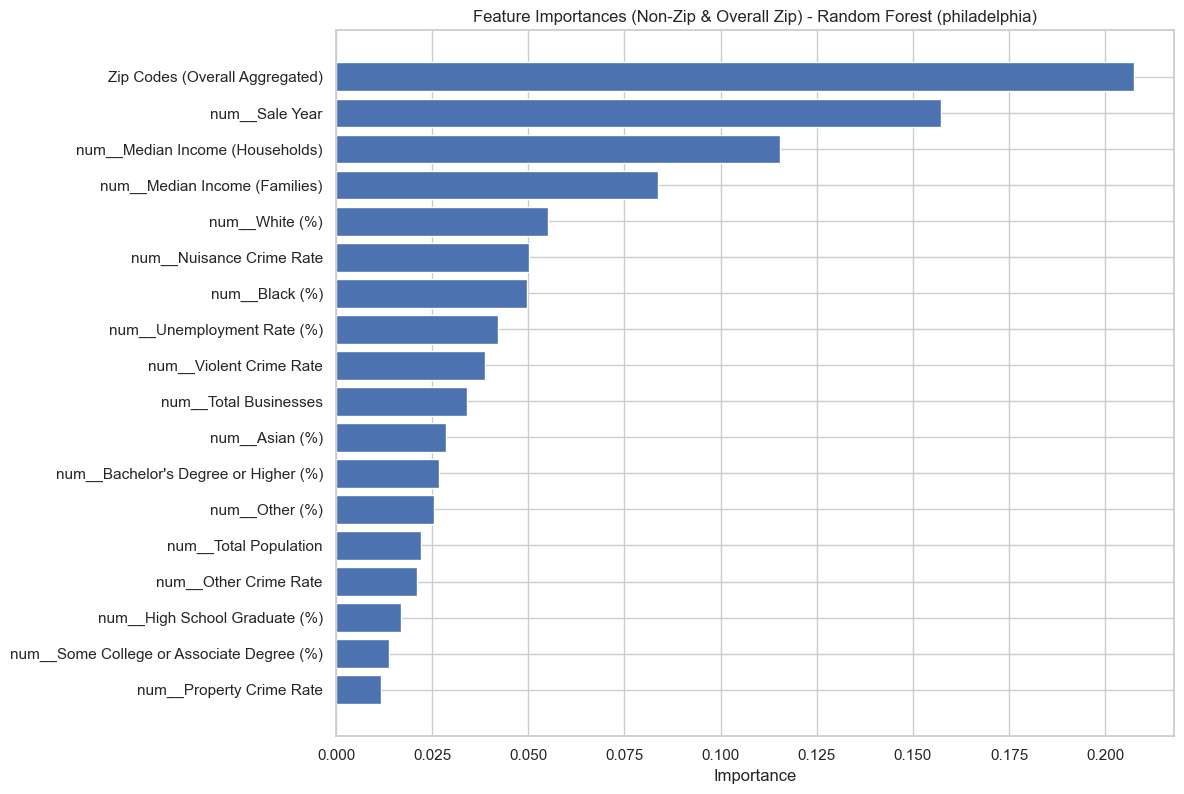

Saved zip feature importance plot to feature_importance_plots/philadelphia_Random Forest_Importances_Zips.png


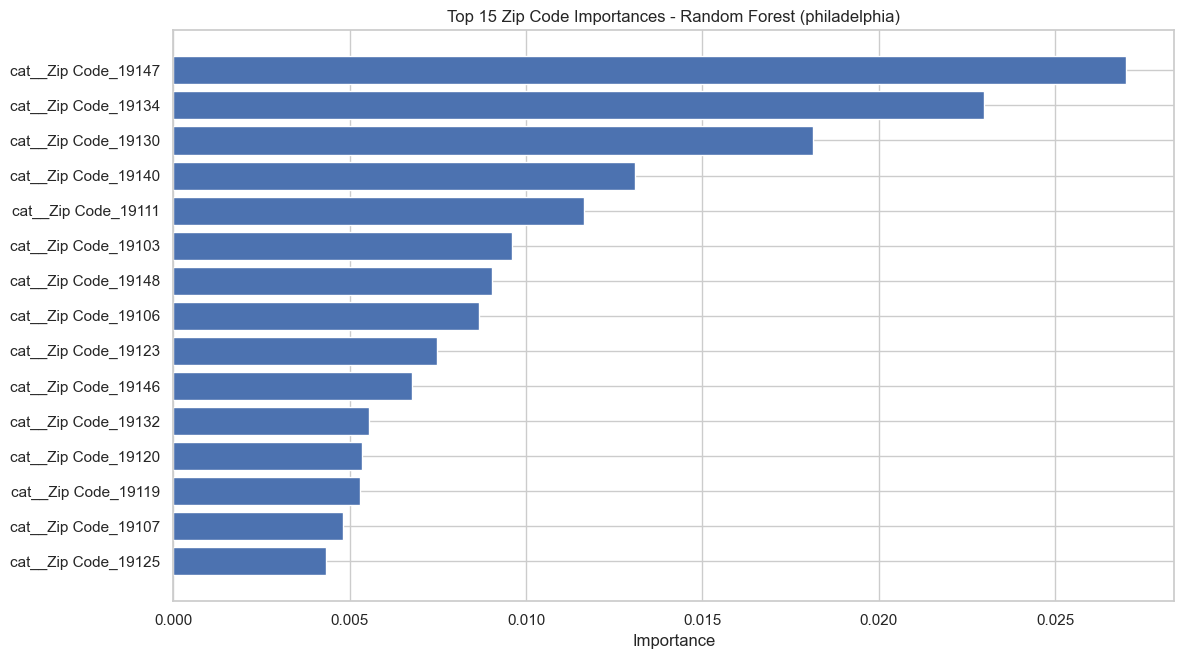


--- Attempting LightGBM for philadelphia ---

--- Running LightGBM Regressor for philadelphia (Scikit-learn) ---
Using sample_frac: 0.1 for philadelphia
--- Starting preprocessing for philadelphia ---
Target 'Sale Price' has been log-transformed.
Converted 'Less than High School (%)' to numeric.
Converted 'High School Graduate (%)' to numeric.
Converted 'Some College or Associate Degree (%)' to numeric.
Converted 'Bachelor's Degree or Higher (%)' to numeric.
Dropped columns: ['Less than High School (%)', 'Total Crime Rate', 'Median Income (Married Families)', 'Median Income (Nonfamily Households)', 'Census Tract', 'Location', 'Address', 'City']
Engineered 'Sale Year' from 'Sale Date'.
'Zip Code' converted to string type for categorical handling.
Preprocessing for philadelphia complete. X shape: (2942097, 18), y shape: (2942097,)
Using FASTER settings for LightGBM RandomizedSearchCV (less thorough).
Starting RandomizedSearchCV for LightGBM (philadelphia)... (n_iter=3, cv=2)
Fitting 2 f

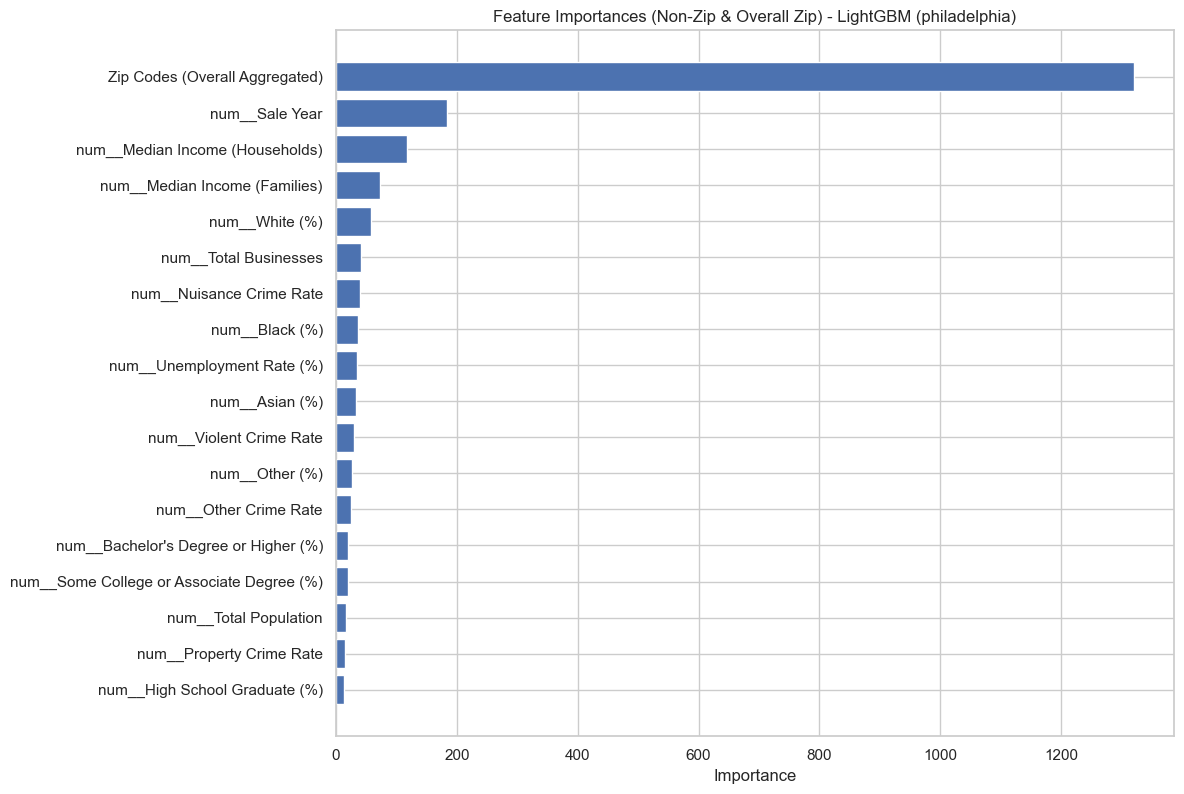

Saved zip feature importance plot to feature_importance_plots/philadelphia_LightGBM_Importances_Zips.png


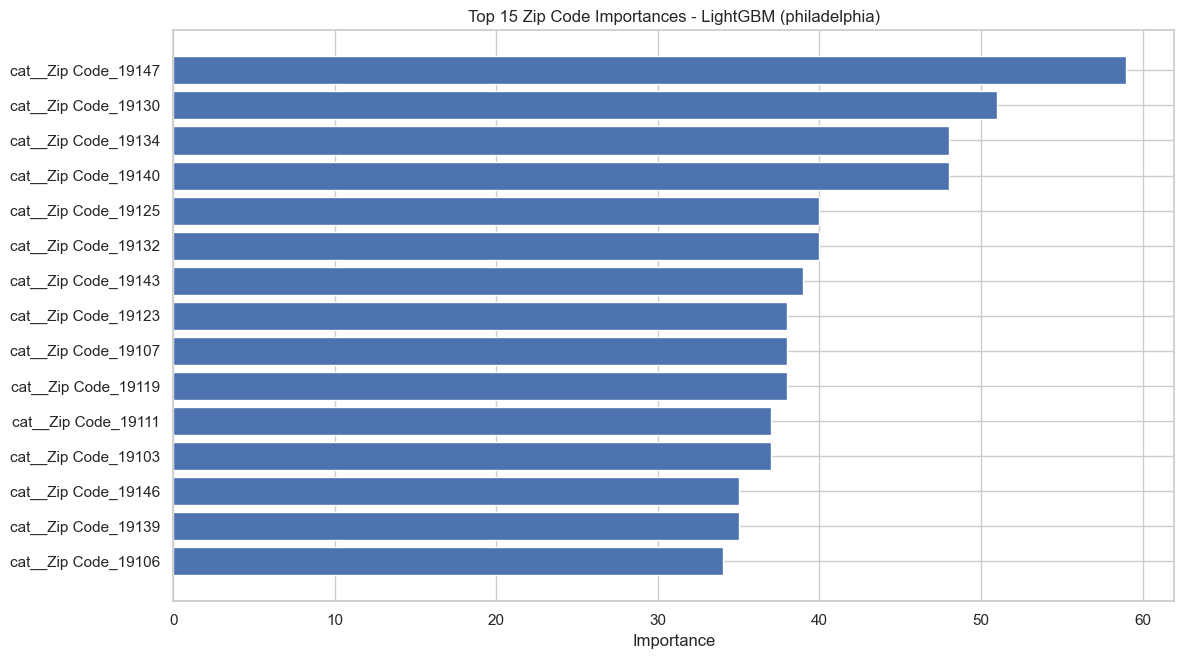


--- Attempting OLS Log-Linear Regression for philadelphia ---
--- Starting preprocessing for philadelphia ---
Target 'Sale Price' has been log-transformed.
Converted 'Less than High School (%)' to numeric.
Converted 'High School Graduate (%)' to numeric.
Converted 'Some College or Associate Degree (%)' to numeric.
Converted 'Bachelor's Degree or Higher (%)' to numeric.
Dropped columns: ['Less than High School (%)', 'Total Crime Rate', 'Median Income (Married Families)', 'Median Income (Nonfamily Households)', 'Census Tract', 'Location', 'Address', 'City']
Engineered 'Sale Year' from 'Sale Date'.
'Zip Code' converted to string type for categorical handling.
Preprocessing for philadelphia complete. X shape: (2942097, 18), y shape: (2942097,)

--- Running Log-Linear Regression for philadelphia (Statsmodels) ---

OLS Regression Results for philadelphia:
                            OLS Regression Results                            
Dep. Variable:             Sale Price   R-squared:        

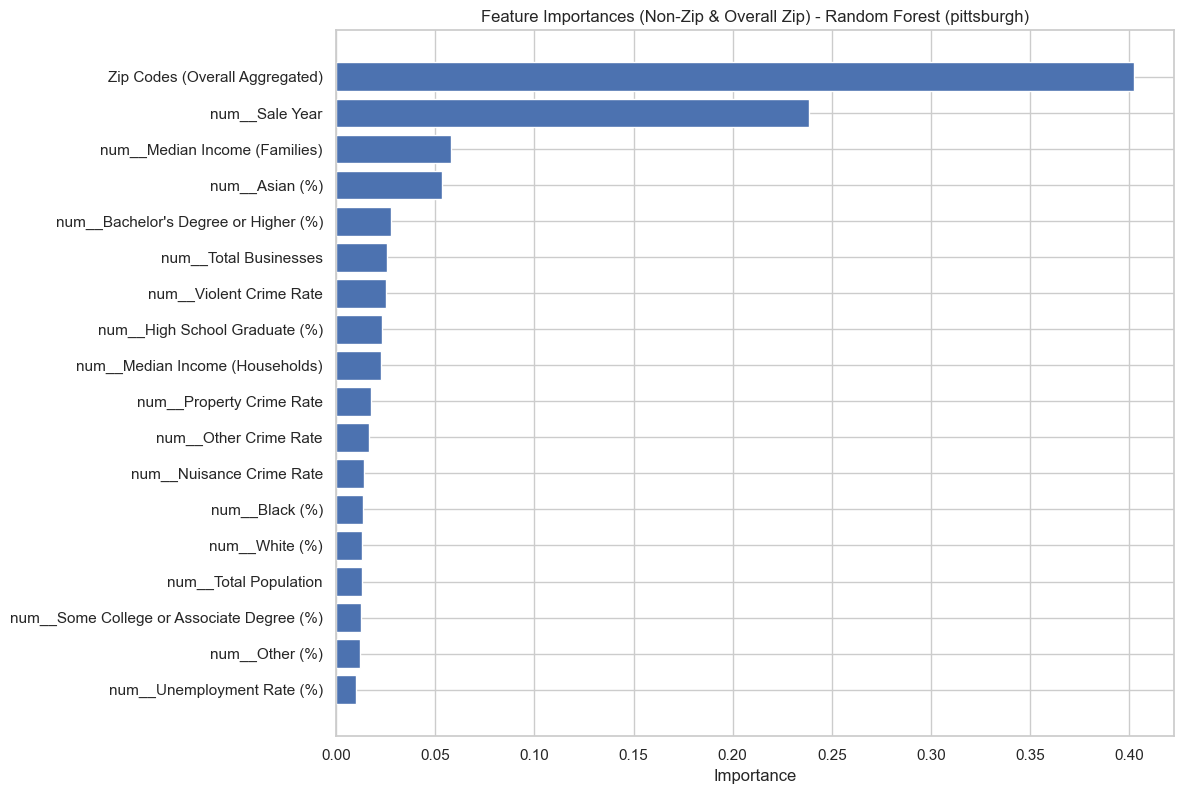

Saved zip feature importance plot to feature_importance_plots/pittsburgh_Random Forest_Importances_Zips.png


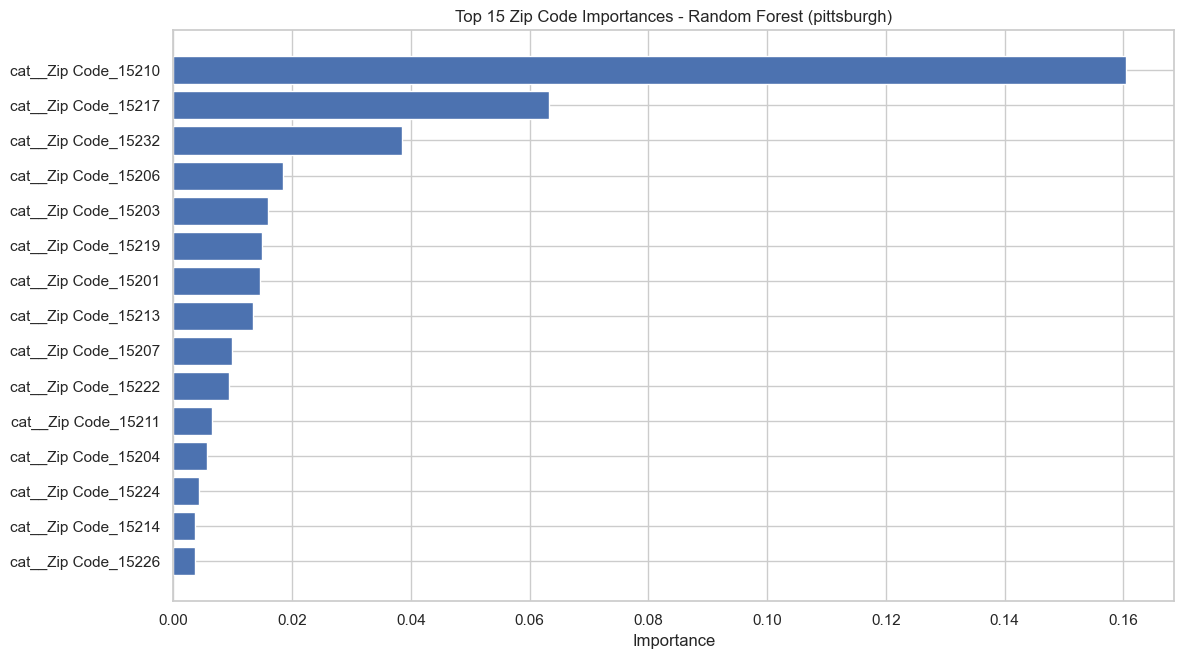


--- Attempting LightGBM for pittsburgh ---

--- Running LightGBM Regressor for pittsburgh (Scikit-learn) ---
Using sample_frac: 0.1 for pittsburgh
--- Starting preprocessing for pittsburgh ---
Target 'Sale Price' has been log-transformed.
Converted 'Less than High School (%)' to numeric.
Converted 'High School Graduate (%)' to numeric.
Converted 'Some College or Associate Degree (%)' to numeric.
Converted 'Bachelor's Degree or Higher (%)' to numeric.
Dropped columns: ['Less than High School (%)', 'Total Crime Rate', 'Median Income (Married Families)', 'Median Income (Nonfamily Households)', 'Census Tract', 'Location', 'INCIDENTTRACT', 'tract', 'Address', 'City']
Engineered 'Sale Year' from 'Sale Date'.
'Zip Code' converted to string type for categorical handling.
Preprocessing for pittsburgh complete. X shape: (721128, 18), y shape: (721128,)
Using FASTER settings for LightGBM RandomizedSearchCV (less thorough).
Starting RandomizedSearchCV for LightGBM (pittsburgh)... (n_iter=3, cv=2)

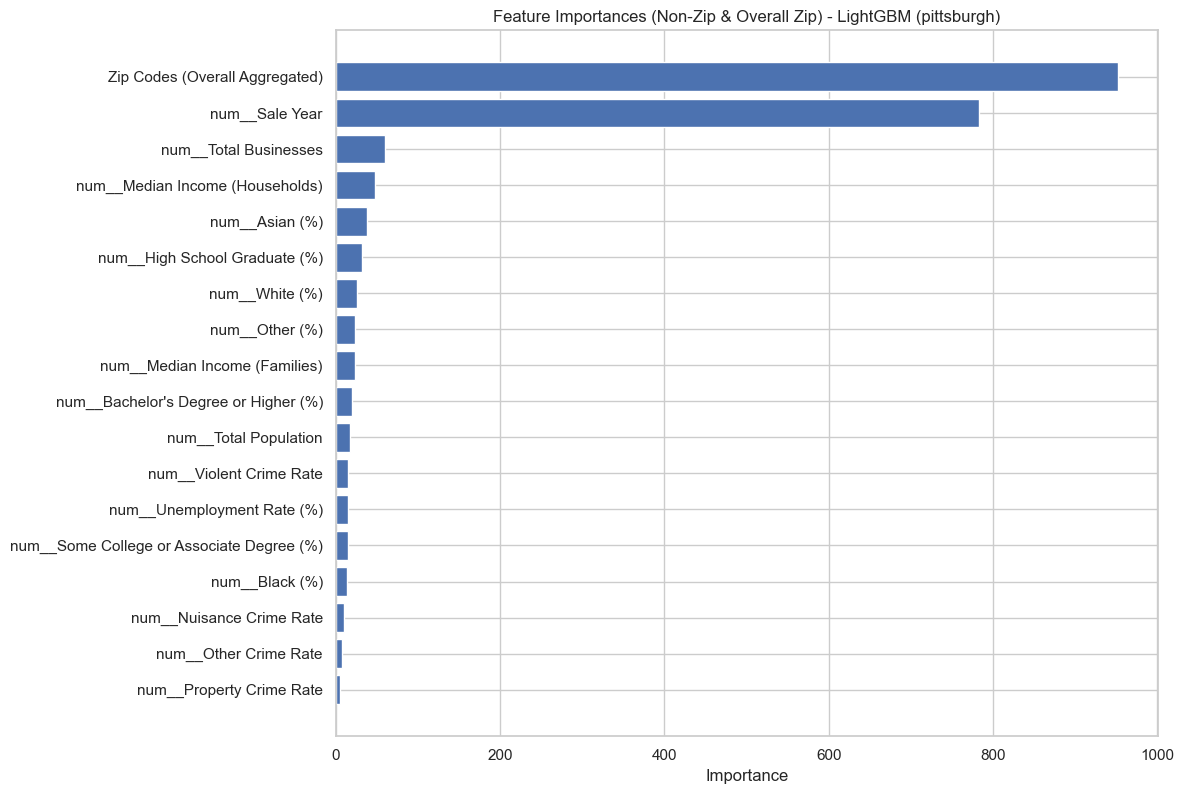

Saved zip feature importance plot to feature_importance_plots/pittsburgh_LightGBM_Importances_Zips.png


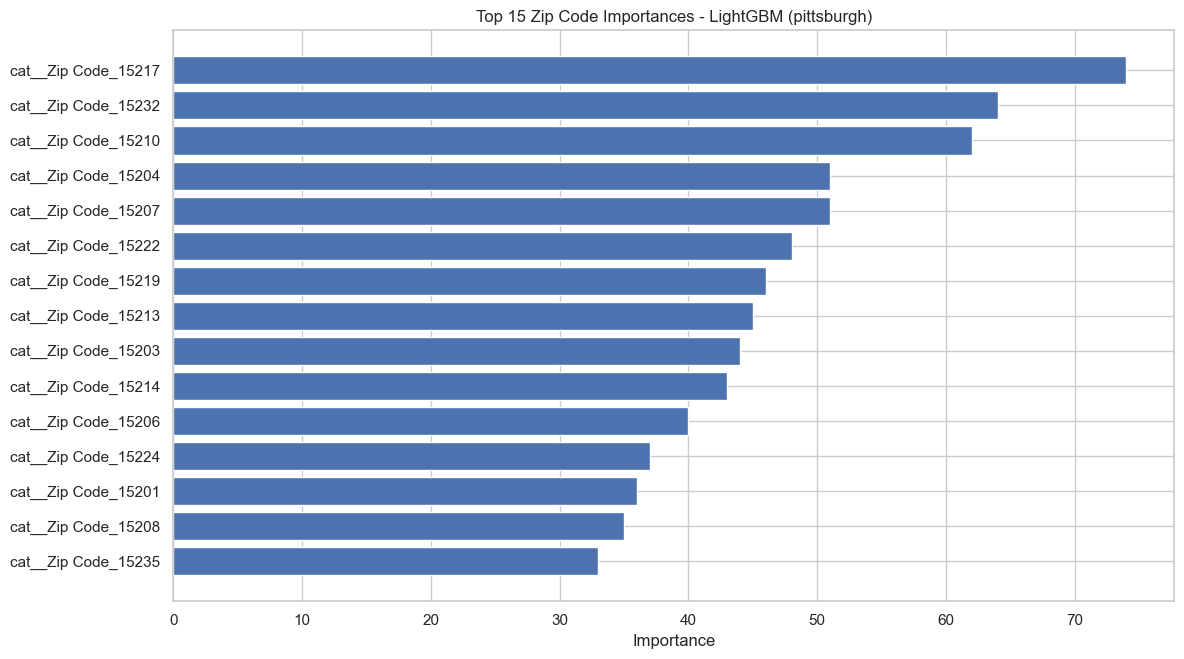


--- Attempting OLS Log-Linear Regression for pittsburgh ---
--- Starting preprocessing for pittsburgh ---
Target 'Sale Price' has been log-transformed.
Converted 'Less than High School (%)' to numeric.
Converted 'High School Graduate (%)' to numeric.
Converted 'Some College or Associate Degree (%)' to numeric.
Converted 'Bachelor's Degree or Higher (%)' to numeric.
Dropped columns: ['Less than High School (%)', 'Total Crime Rate', 'Median Income (Married Families)', 'Median Income (Nonfamily Households)', 'Census Tract', 'Location', 'INCIDENTTRACT', 'tract', 'Address', 'City']
Engineered 'Sale Year' from 'Sale Date'.
'Zip Code' converted to string type for categorical handling.
Preprocessing for pittsburgh complete. X shape: (721128, 18), y shape: (721128,)

--- Running Log-Linear Regression for pittsburgh (Statsmodels) ---

OLS Regression Results for pittsburgh:
                            OLS Regression Results                            
Dep. Variable:             Sale Price   R-sq

/var/folders/_c/t_p4w1f91_11yj717hx6qttc0000gn/T/ipykernel_98628/1912313491.py:91: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



Engineered 'Sale Year' from 'Sale Date'.
'Zip Code' converted to string type for categorical handling.
Preprocessing for detroit complete. X shape: (356370, 18), y shape: (356370,)
Using FASTER settings for RandomizedSearchCV (less thorough).
Starting RandomizedSearchCV for Random Forest (detroit)... (n_iter=3, cv=2)
Fitting 2 folds for each of 3 candidates, totalling 6 fits

Best Parameters for Random Forest (detroit): {'regressor__n_estimators': 50, 'regressor__min_samples_split': 20, 'regressor__min_samples_leaf': 10, 'regressor__max_features': 'log2', 'regressor__max_depth': 15}

detroit - Random Forest (Scikit-learn) Test Set Performance:
R-squared: 0.1072
RMSE (on log scale): 3.7655
Saved non-zip feature importance plot to feature_importance_plots/detroit_Random Forest_Importances_NonZip.png


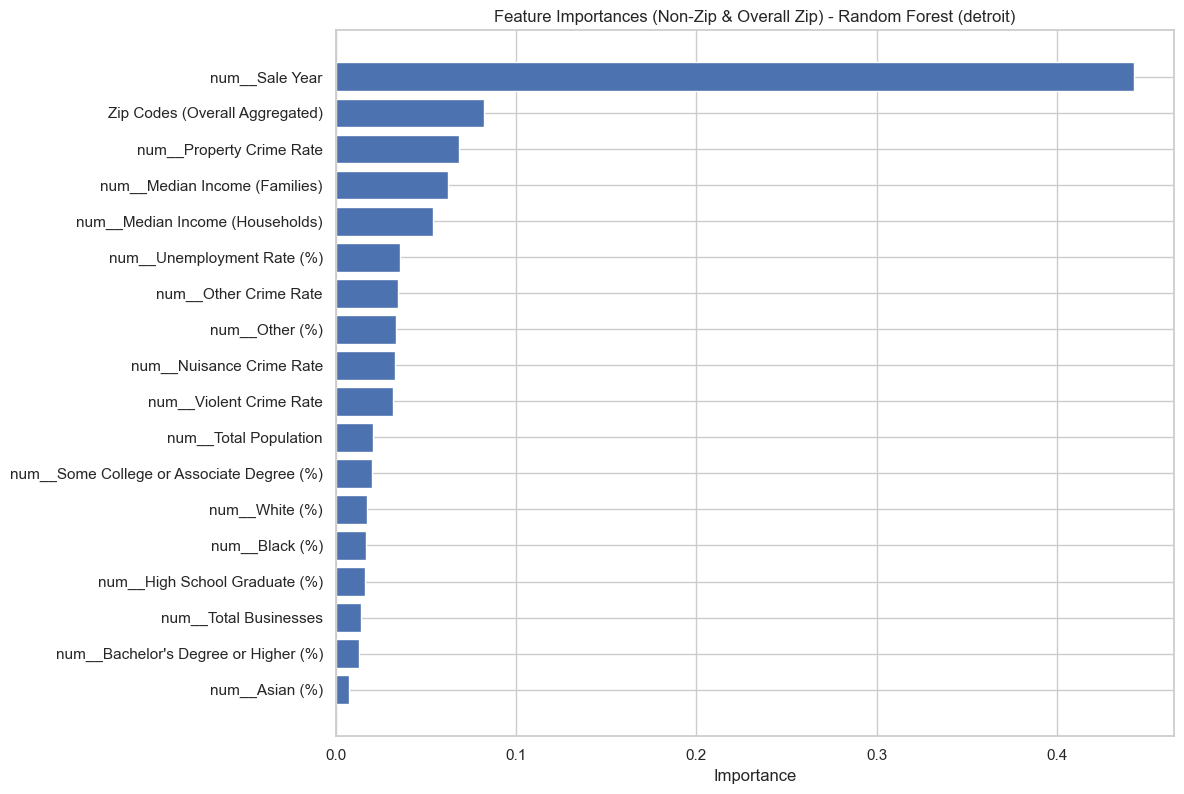

Saved zip feature importance plot to feature_importance_plots/detroit_Random Forest_Importances_Zips.png


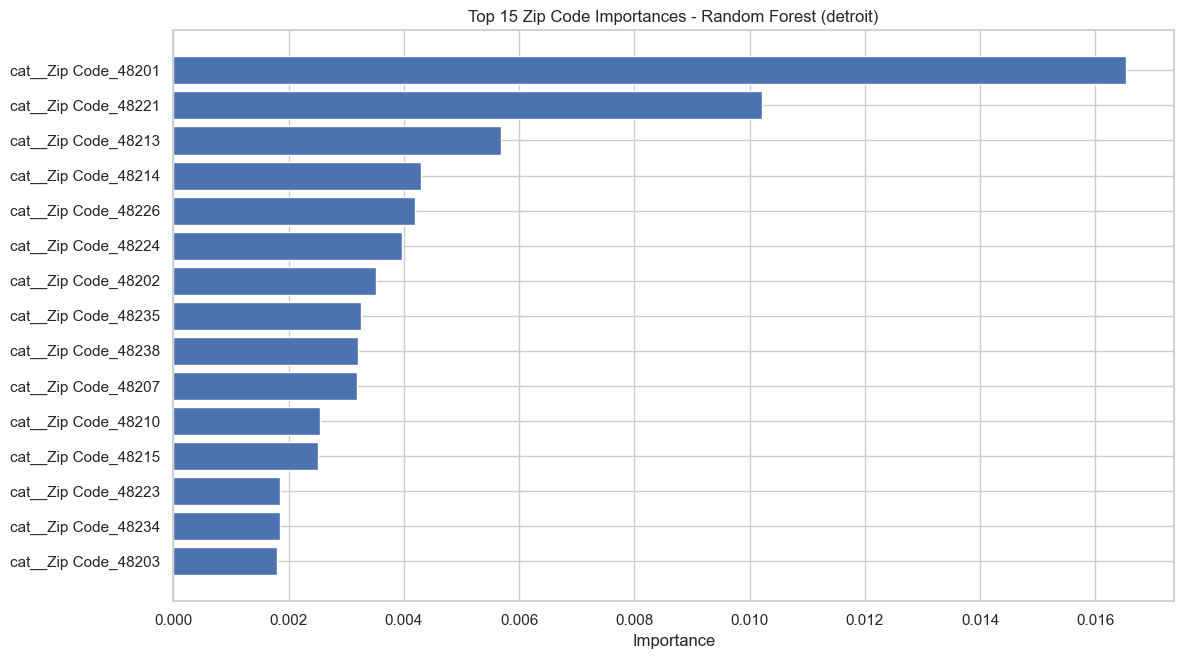


--- Attempting LightGBM for detroit ---

--- Running LightGBM Regressor for detroit (Scikit-learn) ---
Using sample_frac: 0.1 for detroit
--- Starting preprocessing for detroit ---
Target 'Sale Price' has been log-transformed.
Converted 'Less than High School (%)' to numeric.
Converted 'High School Graduate (%)' to numeric.
Converted 'Some College or Associate Degree (%)' to numeric.
Converted 'Bachelor's Degree or Higher (%)' to numeric.
Dropped columns: ['Less than High School (%)', 'Total Crime Rate', 'Median Income (Married Families)', 'Median Income (Nonfamily Households)', 'Census Tract', 'Location', 'Address', 'City']


/var/folders/_c/t_p4w1f91_11yj717hx6qttc0000gn/T/ipykernel_98628/1912313491.py:91: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



Engineered 'Sale Year' from 'Sale Date'.
'Zip Code' converted to string type for categorical handling.
Preprocessing for detroit complete. X shape: (356370, 18), y shape: (356370,)
Using FASTER settings for LightGBM RandomizedSearchCV (less thorough).
Starting RandomizedSearchCV for LightGBM (detroit)... (n_iter=3, cv=2)
Fitting 2 folds for each of 3 candidates, totalling 6 fits

Best Parameters for LightGBM (detroit): {'regressor__subsample': 0.8, 'regressor__num_leaves': 15, 'regressor__n_estimators': 150, 'regressor__max_depth': 10, 'regressor__learning_rate': 0.1, 'regressor__colsample_bytree': 0.8}

detroit - LightGBM (Scikit-learn) Test Set Performance:
R-squared: 0.1029
RMSE (on log scale): 3.7747
Saved non-zip feature importance plot to feature_importance_plots/detroit_LightGBM_Importances_NonZip.png


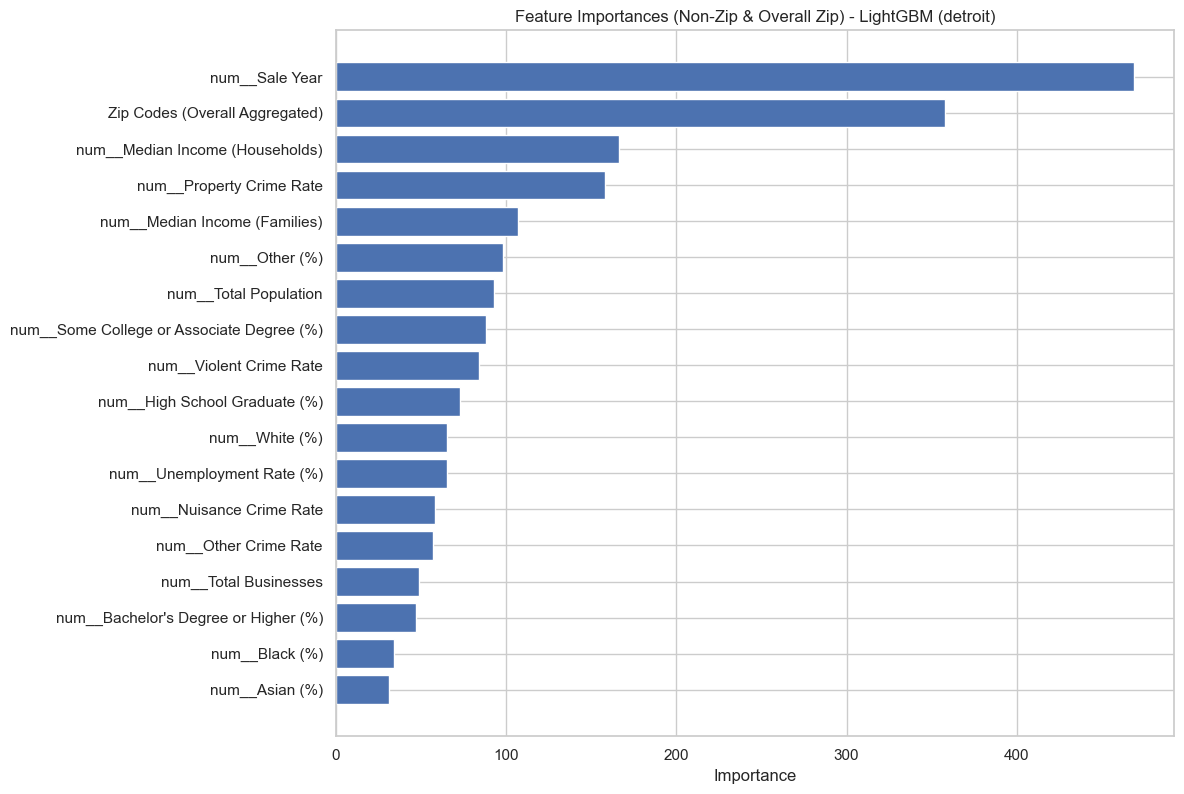

Saved zip feature importance plot to feature_importance_plots/detroit_LightGBM_Importances_Zips.png


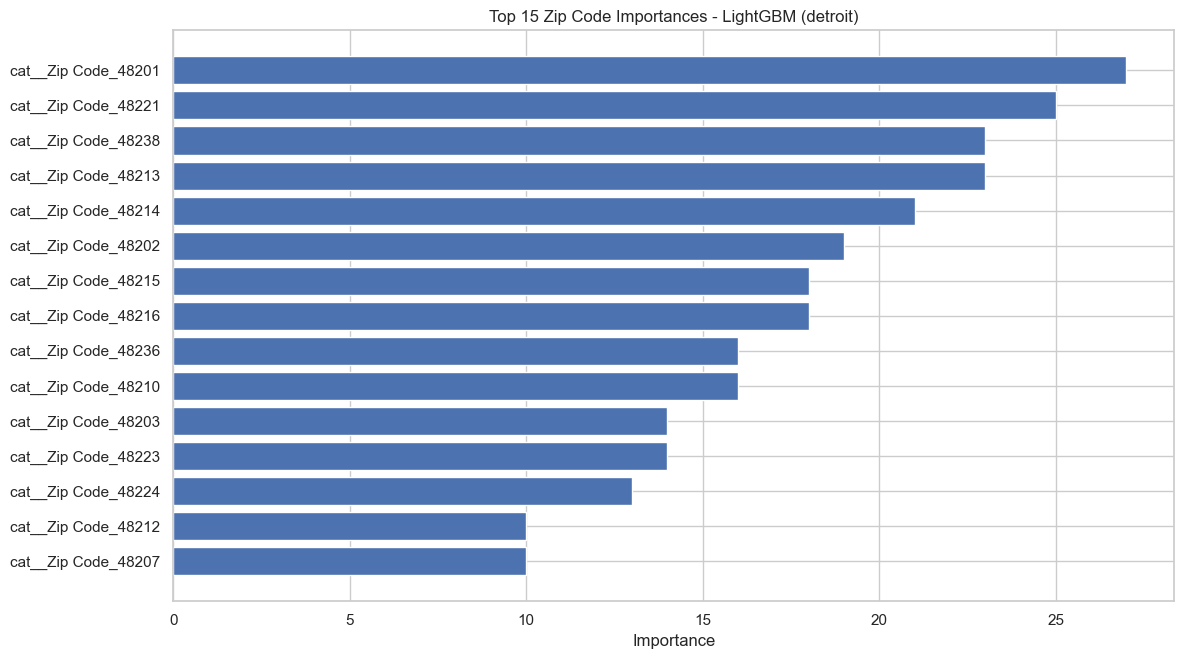


--- Attempting OLS Log-Linear Regression for detroit ---
--- Starting preprocessing for detroit ---
Target 'Sale Price' has been log-transformed.
Converted 'Less than High School (%)' to numeric.
Converted 'High School Graduate (%)' to numeric.
Converted 'Some College or Associate Degree (%)' to numeric.
Converted 'Bachelor's Degree or Higher (%)' to numeric.
Dropped columns: ['Less than High School (%)', 'Total Crime Rate', 'Median Income (Married Families)', 'Median Income (Nonfamily Households)', 'Census Tract', 'Location', 'Address', 'City']


/var/folders/_c/t_p4w1f91_11yj717hx6qttc0000gn/T/ipykernel_98628/1912313491.py:91: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



Engineered 'Sale Year' from 'Sale Date'.
'Zip Code' converted to string type for categorical handling.
Preprocessing for detroit complete. X shape: (356370, 18), y shape: (356370,)

--- Running Log-Linear Regression for detroit (Statsmodels) ---

OLS Regression Results for detroit:
                            OLS Regression Results                            
Dep. Variable:             Sale Price   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     1125.
Date:                Wed, 07 May 2025   Prob (F-statistic):               0.00
Time:                        22:51:12   Log-Likelihood:            -7.9100e+05
No. Observations:              285096   AIC:                         1.582e+06
Df Residuals:                  285078   BIC:                         1.582e+06
Df Model:                          17                                         
Covari

In [194]:
def run_models_for_all_cities(data_dict):
    """
    Iterates through cities in the data_dict and runs specified regression models.
    """
    city_names = list(data_dict.keys()) 
    all_results = {}

    for city in city_names:
        print(f"\n======================================================================")
        print(f"========== PROCESSING MODELS FOR: {city.upper()} ==========")
        print(f"======================================================================")
        
        df_city_original = data_dict[city]
        all_results[city] = {}

        # Run Scikit-learn Tree-Based Models (Random Forest & LightGBM)
        
        print(f"\n--- Attempting Random Forest for {city} ---")
        try:
            rf_model = run_random_forest_regressor_sklearn(df_city_original, city, use_faster_settings = True, sample_frac = 0.1)
            all_results[city]['RandomForest'] = rf_model
        except Exception as e:
            print(f"Could not run Random Forest for {city}. Error: {e}")
            all_results[city]['RandomForest'] = None

        print(f"\n--- Attempting LightGBM for {city} ---")
        try:
            lgbm_model = run_lightgbm_regressor_sklearn(df_city_original, city, use_faster_settings = True, sample_frac = 0.1 )
            all_results[city]['LightGBM'] = lgbm_model
        except Exception as e:
            print(f"Could not run LightGBM for {city}. Error: {e}")
            all_results[city]['LightGBM'] = None
            
        # Run Statsmodels OLS Log-Linear Regression

        print(f"\n--- Attempting OLS Log-Linear Regression for {city} ---")
        try:
            X_processed_city, y_processed_city = preprocess_data_for_modeling(
                df_city_original, 
                city, 
                log_transform_target=True 
            )
            if X_processed_city is not None and y_processed_city is not None:
                ols_model = run_log_linear_regression_sm(
                    X_processed_city, 
                    y_processed_city, 
                    city
                )
                all_results[city]['OLS_LogLinear'] = ols_model
            else:
                print(f"Skipping OLS for {city} due to preprocessing issues.")
                all_results[city]['OLS_LogLinear'] = None
        except Exception as e:
            print(f"Could not run OLS Log-Linear Regression for {city}. Error: {e}")
            all_results[city]['OLS_LogLinear'] = None

        print(f"\n========== COMPLETED PROCESSING FOR: {city.upper()} ==========\n")

    return all_results

if 'acs_commerce_crime_merged_with_sales' in locals() or 'acs_commerce_crime_merged_with_sales' in globals():
    if acs_commerce_crime_merged_with_sales and \
       all(isinstance(df, pd.DataFrame) for df in acs_commerce_crime_merged_with_sales.values()):
        
        
        fitted_models_by_city = run_models_for_all_cities(acs_commerce_crime_merged_with_sales)
        print("\n\n--- All city processing complete. ---")
    else:
        print("The 'acs_commerce_crime_merged_with_sales' dictionary is empty or contains non-DataFrame items.")
        print("Please load your data correctly into this dictionary.")
else:
    print("The 'acs_commerce_crime_merged_with_sales' dictionary is not defined.")
    print("Please load your data and assign it to 'acs_commerce_crime_merged_with_sales'.")
    print("Example structure:")
    print("""
    acs_commerce_crime_merged_with_sales = {
        'Philadelphia': pd.DataFrame(...), # Your Philadelphia DataFrame
        'Pittsburgh': pd.DataFrame(...),   # Your Pittsburgh DataFrame
        'Detroit': pd.DataFrame(...)       # Your Detroit DataFrame
    }
    """)

## Multi Linear Regression Test Runs (Below is version 1) 

In [140]:
import statsmodels.api as sm
import numpy as np
import pandas as pd

def run_regression_for_all_cities(merged_data_dict):
    results = {}

    for city, df in merged_data_dict.items():
        print(f"\n📊 Running regression for: {city.title()}")

        # Drop missing or zero Sale Prices
        df = df[df["Sale Price"].notna() & (df["Sale Price"] > 0)].copy()

        # Convert education columns to numeric
        edu_cols = [
            'Less than High School (%)',
            'High School Graduate (%)',
            'Some College or Associate Degree (%)',
            "Bachelor's Degree or Higher (%)"
        ]
        for col in edu_cols:
            df[col] = pd.to_numeric(df[col], errors='coerce')

        # Drop rows with NaNs in any numeric column
        numeric_df = df.select_dtypes(include=['float64', 'int64']).dropna()

        # Separate X and y
        y = numeric_df['Sale Price']
        X = numeric_df.drop(columns=['Sale Price'])

        # Add constant for intercept
        X = sm.add_constant(X)

        # Fit model
        model = sm.OLS(y, X).fit()
        results[city] = model

        # Print summary
        print(model.summary())

    return results

# Run the function
regression_models = run_regression_for_all_cities(acs_commerce_crime_merged_with_sales)


📊 Running regression for: Philadelphia
                            OLS Regression Results                            
Dep. Variable:             Sale Price   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1743.
Date:                Wed, 07 May 2025   Prob (F-statistic):               0.00
Time:                        07:55:18   Log-Likelihood:            -4.5186e+07
No. Observations:             2942097   AIC:                         9.037e+07
Df Residuals:                 2942075   BIC:                         9.037e+07
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:             Sale Price   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     125.1
Date:                Wed, 07 May 2025   Prob (F-statistic):               0.00
Time:                        07:55:21   Log-Likelihood:            -5.8662e+06
No. Observations:              356370   AIC:                         1.173e+07
Df Residuals:                  356348   BIC:                         1.173e+07
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


## Log Linear Regression

In [141]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

# === PREPARE DATA ===
def preprocess_for_modeling(df):
    df = df.copy()
    df = df[df["Sale Price"].notna() & (df["Sale Price"] > 0)]

    # Convert education columns to numeric if not already
    education_cols = [
        'Less than High School (%)',
        'High School Graduate (%)',
        'Some College or Associate Degree (%)',
        "Bachelor's Degree or Higher (%)"
    ]
    for col in education_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    numeric_cols = df.select_dtypes(include=['float64', 'int64']).drop(columns=['Sale Price']).columns
    df = df.dropna(subset=numeric_cols)

    X = df[numeric_cols]
    y = df["Sale Price"]
    return X, y

# === LOG-LINEAR REGRESSION ===
def log_linear_regression(X, y):
    y_log = np.log(y)
    X_const = sm.add_constant(X)
    model = sm.OLS(y_log, X_const).fit()
    return model

# === RUN FOR ALL CITIES ===
def run_log_linear_for_all_cities(data_dict):
    results = {}
    for city, df in data_dict.items():
        print(f"\n📊 Running Log-Linear Regression for: {city.title()}")
        X, y = preprocess_for_modeling(df)
        model = log_linear_regression(X, y)
        print(model.summary())
        results[city] = model
    return results

# Example usage:
log_linear_models = run_log_linear_for_all_cities(acs_commerce_crime_merged_with_sales)


📊 Running Log-Linear Regression for: Philadelphia
                            OLS Regression Results                            
Dep. Variable:             Sale Price   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                 3.120e+04
Date:                Wed, 07 May 2025   Prob (F-statistic):               0.00
Time:                        07:55:30   Log-Likelihood:            -3.8241e+06
No. Observations:             2942097   AIC:                         7.648e+06
Df Residuals:                 2942075   BIC:                         7.649e+06
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:             Sale Price   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     687.1
Date:                Wed, 07 May 2025   Prob (F-statistic):               0.00
Time:                        07:55:33   Log-Likelihood:            -9.9286e+05
No. Observations:              356370   AIC:                         1.986e+06
Df Residuals:                  356348   BIC:                         1.986e+06
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


## Ridge Lasso Regression 

In [142]:
# # === RIDGE AND LASSO REGRESSION ===
# def ridge_lasso_regression(X, y):
#     X_scaled = StandardScaler().fit_transform(X)
#     X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#     ridge = Ridge(alpha=1.0).fit(X_train, y_train)
#     lasso = Lasso(alpha=0.1).fit(X_train, y_train)

#     return {
#         "ridge_r2": ridge.score(X_test, y_test),
#         "lasso_r2": lasso.score(X_test, y_test),
#         "ridge_model": ridge,
#         "lasso_model": lasso
#     }

# # === RUN RIDGE & LASSO FOR ALL CITIES ===
# def run_ridge_lasso_for_all_cities(data_dict):
#     results = {}
#     for city, df in data_dict.items():
#         print(f"\n📈 Running Ridge & Lasso Regression for: {city.title()}")
#         X, y = preprocess_for_modeling(df)
#         res = ridge_lasso_regression(X, y)
#         print(f"Ridge R^2: {res['ridge_r2']:.4f} | Lasso R^2: {res['lasso_r2']:.4f}")
#         results[city] = res
#     return results

# ridge_lasso_models = run_ridge_lasso_for_all_cities(acs_commerce_crime_merged_with_sales)

## Quantile Regression 

In [144]:
# # === QUANTILE REGRESSION ===
# def quantile_regression(X, y, quantile=0.5):
#     X_const = sm.add_constant(X)
#     model = sm.QuantReg(np.log(y), X_const).fit(q=quantile)
#     return model

# # === RUN QUANTILE FOR ALL CITIES ===
# def run_quantile_for_all_cities(data_dict, quantiles=[0.25, 0.5, 0.75]):
#     results = {}
#     for city, df in data_dict.items():
#         print(f"\n📊 Running Quantile Regressions for: {city.title()}")
#         X, y = preprocess_for_modeling(df)
#         city_results = {}
#         for q in quantiles:
#             print(f"\nQuantile: {q}")
#             model = quantile_regression(X, y, quantile=q)
#             print(model.summary())
#             city_results[q] = model
#         results[city] = city_results
#     return results

# quantile_models = run_quantile_for_all_cities(acs_commerce_crime_merged_with_sales)


In [149]:
# import pandas as pd
# import plotly.express as px

# # R-squared values from your regressions
# r2_data = {
#     'Philadelphia': {
#         'Multi Linear': 0.012,
#         'Log-Linear': 0.182,
#         'Ridge': 0.0122,
#         'Lasso': 0.0122,
#         'Quantile (0.25)': 0.1036,
#         'Quantile (0.5)': 0.1215,
#         'Quantile (0.75)': 0.1333
#     },
#     'Pittsburgh': {
#         'Multi Linear': 0.006,
#         'Log-Linear': 0.102,
#         'Ridge': 0.0068,
#         'Lasso': 0.0068,
#         'Quantile (0.25)': 0.06414,
#         'Quantile (0.5)': 0.06334,
#         'Quantile (0.75)': 0.07584
#     },
#     'Detroit': {
#         'Multi Linear': 0.007,
#         'Log-Linear': 0.039,
#         'Ridge': 0.0045,
#         'Lasso': 0.0044,
#         'Quantile (0.25)': 0.01850,
#         'Quantile (0.5)': 0.05188,
#         'Quantile (0.75)': 0.04721
#     }
# }

# # Convert to DataFrame
# df_r2 = pd.DataFrame(r2_data).reset_index().rename(columns={'index': 'Model'})
# df_r2 = pd.melt(df_r2, id_vars='Model', var_name='City', value_name='R_squared')

# # Create bar chart
# fig = px.bar(df_r2, x='City', y='R_squared', color='Model', barmode='group',
#              title='R² Values Across Regression Models by City',
#              labels={'R_squared': 'R² Value'},
#              height=600)

# # Transparent background
# fig.update_layout(
#     plot_bgcolor='rgba(0,0,0,0)',
#     paper_bgcolor='rgba(0,0,0,0)',
#     yaxis=dict(range=[0, 0.2]),
#     legend_title_text='Model',
#     font=dict(size=14)
# )

# # Save figure (install kaleido first!)
# # 
# fig.write_image("regression_r2_comparison_plotly.png", format="png")

# # Show plot
# fig.show()


/Users/junsik/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [147]:
# import pandas as pd
# import plotly.graph_objects as go

# # Top features from log-linear models
# top_features = {
#     "Philadelphia": [
#         ("Asian (%)", 0.0137, "<0.001"),
#         ("Bachelor's Degree or Higher (%)", 0.0262, "0.015"),
#         ("Median Income (Nonfamily Households)", 9.802e-06, "<0.001"),
#     ],
#     "Pittsburgh": [
#         ("Black (%)", 0.0424, "<0.001"),
#         ("Asian (%)", 0.0373, "<0.001"),
#         ("White (%)", 0.0400, "<0.001"),
#     ],
#     "Detroit": [
#         ("Asian (%)", 0.0071, "<0.001"),
#         ("White (%)", 0.0087, "<0.001"),
#         ("Total Population", 5.17e-05, "<0.001"),
#     ]
# }

# # Format for Plotly Table
# rows = []
# colors = []
# city_colors = {
#     "Philadelphia": '#1e88e5',  # Medium blue
#     "Pittsburgh": '#90caf9',    # Light blue
#     "Detroit": '#ffffff'        # White
# }

# for city, features in top_features.items():
#     for feature, coef, pval in features:
#         rows.append({
#             "City": city,
#             "Feature": feature,
#             "Coefficient": coef,
#             "p-value": pval
#         })
#         colors.append(city_colors[city])

# # Convert to DataFrame
# df = pd.DataFrame(rows)

# # Create interactive color-coded table
# fig = go.Figure(data=[go.Table(
#     header=dict(
#         values=["<b>City</b>", "<b>Feature</b>", "<b>Coefficient</b>", "<b>p-value</b>"],
#         fill_color='royalblue',
#         font=dict(color='white', size=14),
#         align='left'
#     ),
#     cells=dict(
#         values=[df.City, df.Feature, df.Coefficient.round(5), df['p-value']],
#         fill_color=[colors],
#         align='left',
#         font=dict(size=13, color='black')
#     )
# )])

# fig.update_layout(
#     title="Top Predictors of Sale Price (Log-Linear Regression)",
#     title_font_size=20,
#     margin=dict(l=20, r=20, t=60, b=20),
#     paper_bgcolor='rgba(0,0,0,0)'
# )

# fig.show()

In [150]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Use a clean and appealing theme
# sns.set_theme(style="whitegrid", context="notebook")

# # Custom color palette for city comparison
# city_palette = {
#     "Philadelphia": "#1f77b4",  # Soft blue
#     "Pittsburgh": "#2ca02c",    # Medium green
#     "Detroit": "#ff7f0e"        # Orange
# }

# # === BAR CHART: Top LightGBM Feature Importances by City ===
# top_n = 5
# importance_df = pd.DataFrame()

# for city, metrics in results.items():
#     fi = pd.DataFrame({
#         'Feature': metrics['X_train'].columns,
#         'Importance': metrics['lgb_model'].feature_importances_,
#         'City': city.title()  # Capitalize to match palette keys
#     })
#     importance_df = pd.concat([importance_df, fi.nlargest(top_n, 'Importance')])

# plt.figure(figsize=(12, 6))
# sns.barplot(data=importance_df, x='Importance', y='Feature', hue='City', palette=city_palette)
# plt.title("Top LightGBM Feature Importances by City")
# plt.xlabel("Importance")
# plt.ylabel("Feature")
# plt.legend(title="City")
# plt.tight_layout()
# plt.savefig("top_importances_by_city.png", dpi=300)
# plt.show()


NameError: name 'results' is not defined

In [151]:
# # === CORRELATION HEATMAPS FOR EACH CITY ===
# for city in results:
#     X_corr = results[city]['X_train'].corr()

#     plt.figure(figsize=(12, 10))
#     sns.heatmap(X_corr, cmap="crest", center=0, annot=False, cbar_kws={'shrink': 0.7})
#     plt.title(f"{city.title()} - Feature Correlation Matrix", fontsize=14)
#     plt.tight_layout()
#     plt.savefig(f"{city.lower()}_correlation_heatmap.png", dpi=300)
#     plt.show()

NameError: name 'results' is not defined

## Machine Learning Algo 

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# === PREPROCESSING FUNCTION ===
def preprocess_for_modeling(df):
    """
    Preprocess the DataFrame for modeling:
    - Remove rows with missing or zero 'Sale Price'.
    - Convert education columns (given in percentage as strings) to numeric.
    - Drop rows with NaNs in the numeric columns (excluding 'Sale Price').
    Returns predictors X and target y.
    """
    df = df.copy()
    df = df[df["Sale Price"].notna() & (df["Sale Price"] > 0)]
    
    # Convert education columns to numeric if not already numeric
    education_cols = [
        'Less than High School (%)',
        'High School Graduate (%)',
        'Some College or Associate Degree (%)',
        "Bachelor's Degree or Higher (%)"
    ]
    for col in education_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Select only numeric columns (excluding the target)
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).drop(columns=['Sale Price'], errors='ignore').columns
    df = df.dropna(subset=numeric_cols)
    
    X = df[numeric_cols]
    y = df["Sale Price"]
    return X, y

# === LOAD YOUR DATA ===
# For this example, we'll use the Philadelphia dataset.
# In your context, 'acs_commerce_crime_merged_with_sales' is already defined.
final_data = acs_commerce_crime_merged_with_sales['philadelphia']

# Preprocess the data
X, y = preprocess_for_modeling(final_data)
print(f"Preprocessed data: X shape = {X.shape}, y shape = {y.shape}")

# === TRAIN-TEST SPLIT ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Preprocessed data: X shape = (2942097, 21), y shape = (2942097,)



===== Processing Philadelphia Dataset =====
Preprocessed data for Philadelphia: X shape = (2942097, 21), y shape = (2942097,)
Philadelphia - XGBoost RMSE: 1176989.08, R²: 0.023
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021368 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4543
[LightGBM] [Info] Number of data points in the train set: 2353677, number of used features: 21
[LightGBM] [Info] Start training from score 161519.473459
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

Detroit - LightGBM RMSE: 2747837.61, R²: -0.021


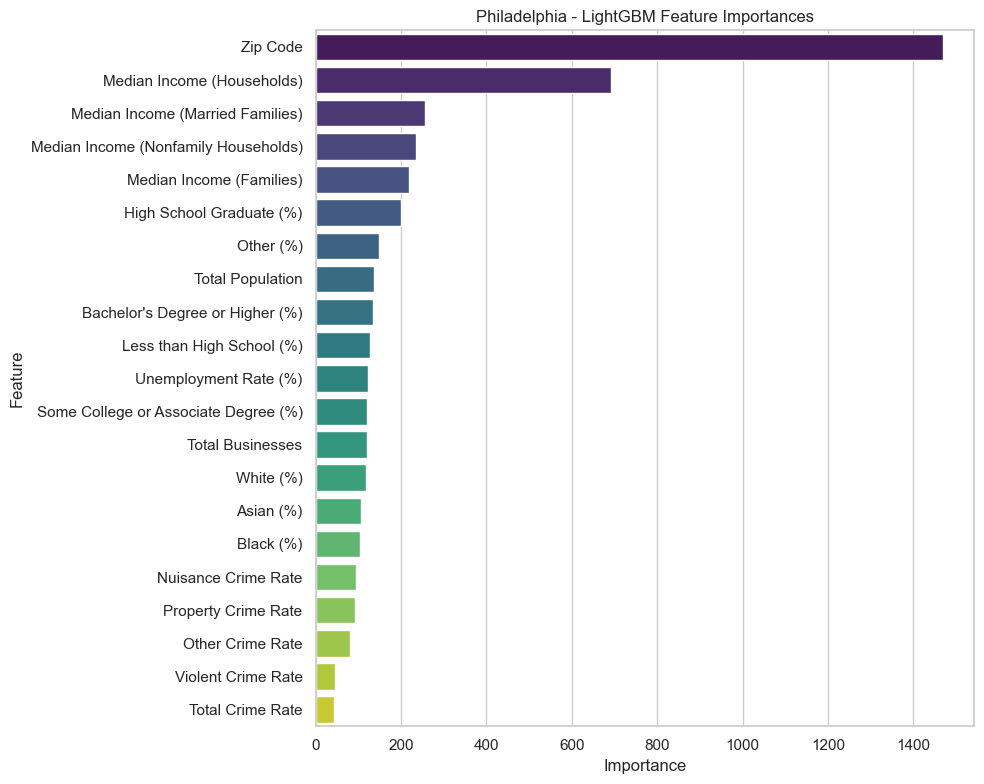

NameError: name 'output_dir' is not defined

In [153]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns

# === PREPROCESSING FUNCTION ===
def preprocess_for_modeling(df):
    df = df.copy()
    # Keep only rows with valid and positive Sale Price
    df = df[df["Sale Price"].notna() & (df["Sale Price"] > 0)]
    
    # Convert education columns to numeric if not already
    education_cols = [
        'Less than High School (%)',
        'High School Graduate (%)',
        'Some College or Associate Degree (%)',
        "Bachelor's Degree or Higher (%)"
    ]
    for col in education_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Select only numeric columns (excluding the target)
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).drop(columns=['Sale Price'], errors='ignore').columns
    df = df.dropna(subset=numeric_cols)
    
    X = df[numeric_cols]
    y = df["Sale Price"]
    return X, y

# === INITIALIZE RESULTS DICTIONARIES ===
results = {}
cities = list(acs_commerce_crime_merged_with_sales.keys())

for city in cities:
    print(f"\n===== Processing {city.title()} Dataset =====")
    
    # Load data for the current city
    data = acs_commerce_crime_merged_with_sales[city]
    
    # Preprocess
    X, y = preprocess_for_modeling(data)
    print(f"Preprocessed data for {city.title()}: X shape = {X.shape}, y shape = {y.shape}")
    
    # Train-test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # === XGBOOST REGRESSION ===
    xgb_model = xgb.XGBRegressor(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=5,
        random_state=42,
        n_jobs=-1
    )
    xgb_model.fit(X_train, y_train)
    y_pred_xgb = xgb_model.predict(X_test)
    rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
    r2_xgb = r2_score(y_test, y_pred_xgb)
    print(f"{city.title()} - XGBoost RMSE: {rmse_xgb:.2f}, R²: {r2_xgb:.3f}")
    
    # === LIGHTGBM REGRESSION ===
    lgb_model = lgb.LGBMRegressor(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=5,
        random_state=42,
        n_jobs=-1
    )
    lgb_model.fit(X_train, y_train)
    y_pred_lgb = lgb_model.predict(X_test)
    rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred_lgb))
    r2_lgb = r2_score(y_test, y_pred_lgb)
    print(f"{city.title()} - LightGBM RMSE: {rmse_lgb:.2f}, R²: {r2_lgb:.3f}")
    
    # Store models and metrics
    results[city] = {
        'rmse_xgb': rmse_xgb,
        'r2_xgb': r2_xgb,
        'rmse_lgb': rmse_lgb,
        'r2_lgb': r2_lgb,
        'xgb_model': xgb_model,
        'lgb_model': lgb_model,
        'X_train': X_train,
        'X_test': X_test,
        'y_test': y_test,
        'y_pred_xgb': y_pred_xgb,
        'y_pred_lgb': y_pred_lgb
    }
    
# === VISUALIZATIONS: LightGBM Feature Importances for each city ===
import matplotlib.pyplot as plt
import seaborn as sns

for city, metrics in results.items():
    # Extract the feature names and LightGBM importances
    features = metrics['X_train'].columns
    lgb_importances = metrics['lgb_model'].feature_importances_
    
    # Create a DataFrame for LightGBM importances
    fi_df = pd.DataFrame({
        'Feature': features,
        'LightGBM Importance': lgb_importances
    })
    # Sort descending by importance
    fi_df.sort_values(by='LightGBM Importance', ascending=False, inplace=True)
    
    # Plot only LightGBM's feature importances
    plt.figure(figsize=(10, 8))
    sns.barplot(x='LightGBM Importance', y='Feature', data=fi_df, palette='viridis')
    plt.title(f"{city.title()} - LightGBM Feature Importances")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()

# Save the figure
    filename = f"{output_dir}/{city.lower().replace(' ', '_')}_lightgbm_importance.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight', transparent=True)
    
    plt.show()

In [154]:
# === RANDOM FOREST REGRESSION ===
rf_model = RandomForestRegressor(
    n_estimators=100, 
    max_depth=None, 
    random_state=42, 
    n_jobs=-1
)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest RMSE: {rmse_rf:.2f}, R²: {r2_rf:.3f}")


Random Forest RMSE: 2743032.32, R²: -0.017


In [155]:
# === VISUALIZATIONS ===

# 1. FEATURE IMPORTANCE COMPARISON
feature_names = X_train.columns
gb_importances = gb_model.feature_importances_
rf_importances = rf_model.feature_importances_

# Create a DataFrame for side-by-side feature importance comparison.
fi_df = pd.DataFrame({
    'Feature': feature_names,
    'GB Importance': gb_importances,
    'RF Importance': rf_importances
}).sort_values(by='GB Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='GB Importance', y='Feature', data=fi_df, color='green', label='Gradient Boosting')
sns.barplot(x='RF Importance', y='Feature', data=fi_df, color='blue', alpha=0.6, label='Random Forest')
plt.title("Feature Importances: Gradient Boosting vs. Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.legend()
plt.tight_layout()
plt.show()



NameError: name 'gb_model' is not defined

In [156]:
# 2. ACTUAL VS. PREDICTED SCATTER PLOT (GRADIENT BOOSTING)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.3, color='green')
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price (GB)")
plt.title("Gradient Boosting: Actual vs. Predicted Sale Price")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()

NameError: name 'y_pred_gb' is not defined

<Figure size 800x600 with 0 Axes>

/Users/junsik/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



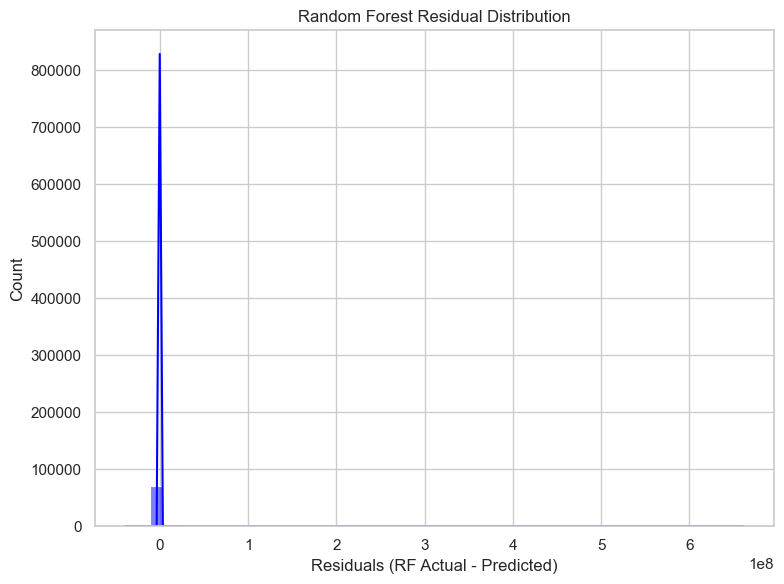

In [157]:
# 3. RESIDUAL DISTRIBUTION (RANDOM FOREST)
rf_residuals = y_test - y_pred_rf
plt.figure(figsize=(8, 6))
sns.histplot(rf_residuals, bins=50, kde=True, color='blue')
plt.xlabel("Residuals (RF Actual - Predicted)")
plt.title("Random Forest Residual Distribution")
plt.tight_layout()
plt.show()